# "Clustering players based on skills"



# <font color=red>Connection to the drive</font>

In [ ]:
#collapse 
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#collapse_output
!pip install emoji 

In [ ]:
#collapse_output
!pip install emojis

In [ ]:
#collapse 
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

# Importing required libraries and packages
import emoji
import emojis
import pandas as pd
pd.options.display.max_columns = 110  # None -> No Restrictions
pd.options.display.max_rows = 200    # None -> Be careful with this 
pd.options.display.max_colwidth = 60
pd.options.display.precision = 1
pd.options.display.max_info_columns = 200
import numpy as np
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

print(emoji.emojize(":laptop:")*28
      ,"\n\nAll the required libraries and packages are imported successfully !!!\n\n"
      ,emoji.emojize(":laptop:")*28)

💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻 

All the required libraries and packages are imported successfully !!!

 💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻


In [ ]:
#collapse 
#loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Projects/fifa/players_20.csv')

print(emoji.emojize(":file_folder:")*12
      ,"\n\nData loaded successfully !!!\n\n"
      ,emoji.emojize(":file_folder:")*12)

📁📁📁📁📁📁📁📁📁📁📁📁 

Data loaded successfully !!!

 📁📁📁📁📁📁📁📁📁📁📁📁


In [ ]:
#collapse 
# To have a glimpse of the data
print("\nGlimpse of data : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A60B2E'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_max(color='#0074FF',axis=0)\
.highlight_min(color='#00FFE5',axis=0)\
.highlight_null(null_color='#CCB3C')


Glimpse of data :  👇🏻👇🏻👇🏻



# <font color=red>Basic Info of the dataset</font>

In [ ]:
#collapse 
#finding the no. of rows and cols
print("\nFinding the no. of rows and cols in the dataset : \n\n"
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("") 

print("No. of Players : {}".format(data.shape[0]))
print("No. of features : {} ".format(data.shape[1]))


Finding the no. of rows and cols in the dataset : 

 👇🏻👇🏻👇🏻

No. of Players : 18278
No. of features : 104 


In [ ]:
#collapse 
# Overview of shape, attributes, types and missing values
print("\nOverview of shape, attributes, types and missing values : \n\n"
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("") 

overview = data.info(verbose=True)


Overview of shape, attributes, types and missing values : 

 		 👇🏻👇🏻👇🏻

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   player_url                  18278 non-null  object 
 2   short_name                  18278 non-null  object 
 3   long_name                   18278 non-null  object 
 4   age                         18278 non-null  int64  
 5   dob                         18278 non-null  object 
 6   height_cm                   18278 non-null  int64  
 7   weight_kg                   18278 non-null  int64  
 8   nationality                 18278 non-null  object 
 9   club                        18278 non-null  object 
 10  overall                     18278 non-null  int64  
 11  potential                   18278 non-null  int64  
 12  value_eur     

<font color=skyblue>📝📝 There are 45 int variables, 16 float variables and 43 object variables in the dataset.</font>

In [ ]:
#collapse 
# General stats of the numerical variables
print("\nGeneral stats of the numerical variables : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data.describe().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#753976'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


General stats of the numerical variables :  👇🏻👇🏻👇🏻



<font color=skyblue>
📝📝 Essence of above dataframe : <br>
✏️ The min. age of the players is 16, avg. age is 25 and the max. age upto which they can play is 42 years.<br>
✏️ The min. height of the players is 156cm, avg. height is 181cm and the max. height is 205cm.<br>
✏️ The min. weight of the players should be 50Kg, avg. weight should be 75Kg and the max. weight should not exceed than 110Kg.<br>
✏️ The min. overall score of the players is 48, avg. overall score is 66 and the max. overall score is 94 out of 100.<br>
✏️ The min. potential score of the players is 49, avg. potential score is 71.5 and the max. overall score is 95 out of 100.<br>
✏️ The avg. valuation of the players is around 2.5 million Euros and the max. valuation is 105 million Euros.<br>
✏️ The avg. wage of the players is around 9.5k Euros and the max. wage is around 0.56 million Euros.</font>

In [ ]:
#collapse 
# General stats of the categorical variables
print("\nGeneral stats of the categorical variables : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
data.describe(include=['object']).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#117A65'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


General stats of the categorical variables :  👇🏻👇🏻👇🏻



<font color=skyblue>
📝📝 Essence of above dataframe : <br>
✏️ There were 162 different countries participated in FIFA 2020 and most players were from England .<br>
✏️ There were 698 different clubs and the top clubs was CD Leganés.<br>
✏️ The most preferred position of the players was CB.<br>
✏️ The most preferred foot by the players was Right.<br>
✏️ The work rate of most of the players is Medium/Medium.<br>
✏️ The body type of most of the players is Normal.</font>

# <font color=red>Data Preparation

## <font color=green>1. Finding duplicate values</font>

In [ ]:
#collapse 
# checking for duplicate values if present in the dataframe
print("Duplicate Data"
,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":check_mark_button:")*3
,"\n\n",data.duplicated().any()
,"\n\n",emoji.emojize(":check_mark_button:")*3)

Duplicate Data ❓❓ 

✅✅✅ 

 False 

 ✅✅✅


<font color=skyblue>📝📝 There are no duplicate values in the dataset.</font>

## <font color=green>2. Finding Missing Values</font>

In [ ]:
#collapse 
#checking for missing values
print("Missing values"
      ,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":cross_mark_button::")*3
,"\n\n",data.isnull().values.any()
,"\n\n",emoji.emojize(":cross_mark_button:")*3)

Missing values ❓❓ 

❎:❎:❎: 

 True 

 ❎❎❎


In [ ]:
#collapse 
# missing values in the dataset
print('\nMissing Values  \n'
,"\n",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
data.isnull().values.sum()


Missing Values  
 
 👇🏻👇🏻👇🏻



244935

In [ ]:
#collapse 
print('\nMissing Values in the dataset : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')



Missing Values in the dataset :  👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 There are 244935 missing values in the dataset. </font>

In [ ]:
#collapse 
# missing values in every column of the dataset
print('\nMissing Values in every column of the data : \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

missing = data.isnull().sum().sort_values(ascending=False)
missing = missing.head(50)
missing = missing.to_frame()
missing.columns = ['missing_values']
missing.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Missing Values in every column of the data : 

   👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 There are missing values in 48 columns of the dataset and no. of missing values in those 48 columns can be seen from the above.</font>


## <font color=green>3. Finding Features with one value</font>

In [ ]:
#collapse 
# All the features with their unique values
print('\nUnique Values in each column of the data : \n\n'
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
for column in data.columns:
  print(emoji.emojize(":arrow_right:", use_aliases=True)
  ,column
  ,emoji.emojize(":1234:", use_aliases=True)
  ,data[column].nunique())



Unique Values in each column of the data : 

 	 👇🏻👇🏻👇🏻

➡ sofifa_id 🔢 18278
➡ player_url 🔢 18278
➡ short_name 🔢 17354
➡ long_name 🔢 18218
➡ age 🔢 27
➡ dob 🔢 6142
➡ height_cm 🔢 49
➡ weight_kg 🔢 56
➡ nationality 🔢 162
➡ club 🔢 698
➡ overall 🔢 47
➡ potential 🔢 47
➡ value_eur 🔢 214
➡ wage_eur 🔢 141
➡ player_positions 🔢 643
➡ preferred_foot 🔢 2
➡ international_reputation 🔢 5
➡ weak_foot 🔢 5
➡ skill_moves 🔢 5
➡ work_rate 🔢 9
➡ body_type 🔢 10
➡ real_face 🔢 2
➡ release_clause_eur 🔢 1224
➡ player_tags 🔢 83
➡ team_position 🔢 29
➡ team_jersey_number 🔢 99
➡ loaned_from 🔢 316
➡ joined 🔢 1760
➡ contract_valid_until 🔢 8
➡ nation_position 🔢 26
➡ nation_jersey_number 🔢 30
➡ pace 🔢 70
➡ shooting 🔢 79
➡ passing 🔢 68
➡ dribbling 🔢 71
➡ defending 🔢 76
➡ physic 🔢 61
➡ gk_diving 🔢 47
➡ gk_handling 🔢 47
➡ gk_kicking 🔢 52
➡ gk_reflexes 🔢 48
➡ gk_speed 🔢 53
➡ gk_positioning 🔢 50
➡ player_traits 🔢 921
➡ attacking_crossing 🔢 88
➡ attacking_finishing 🔢 93
➡ attacking_heading_accuracy 🔢 89
➡ attacking_short_passin

<font color=skyblue>📝📝 There is no feature having only 1 value.</font>

## <font color=green>4. Inserting a new column 'positions' based on the 'player_positions' </font>

In [ ]:
#collapse 
# function for dividing the player positions into 4 main categories of positions 
def player_pos(row):
    positions = row['player_positions'].split(', ') 
    N = len(positions)
    if N < 3:
        pos = positions[0]
        if pos in ['ST', 'LW', 'RW','CF']: 
            return 0 # Attacker
        elif pos in ['CAM', 'LM', 'CM', 'RM', 'CDM']: 
            return 1 # Midfielder
        elif pos in ['LWB', 'RWB', 'LB', 'CB', 'RB']:
            return 2 # Defender
        elif pos in ['GK']:
            return 3 # Goalkeeper
    else: 
        position_counter = [0, 0, 0, 0] 
        for pos in positions:
            if pos in ['ST', 'LW', 'RW','CF']: 
                index = 0 # Attacker
            elif pos in ['CAM', 'LM', 'CM', 'RM', 'CDM']: 
                index = 1 # Midfielder
            elif pos in ['LWB', 'RWB', 'LB', 'CB', 'RB']: 
                index = 2 # Defender
            elif pos in ['GK']:
                index = 3 # Goalkeeper
            else:
                continue 
            position_counter[index] += 1 

        return position_counter.index(max(position_counter))

In [ ]:
#collapse 
# creating a new column and applying the above function on it
data['positions'] = data.apply(player_pos, axis=1)

# replacing the int values with corresponding positions
data.replace({'positions' : { 0 : 'Attacker' , 1 : 'Midfielder' , 2 : 'Defender' , 3 : 'Goalkeeper' }},inplace=True)
def color_red(val):
  if val=='Attacker':
    color = 'brown'
  elif val=='Defender':
    color = 'darkgreen'
  elif val=='Midfielder':
    color = 'orange'  
  else:
    color = 'darkblue'
  return 'color: %s' % color

print('\nNew Column added as "postions" \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data[['positions']].head(50).style.applymap(color_red).set_table_styles(
[{'selector': 'th',
  'props': [('background', '#035753'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


New Column added as "postions" 

   👇🏻👇🏻👇🏻



# <font color=red>Exploratory Data Analysis</font>

## <font color=green>Exploring numerical features</font>

In [ ]:
#collapse 
#list of numerical variables
numerical_features = [feature for feature in data.columns if (data[feature].dtypes!='O')]
print('No. of numerical variables'
,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")*2
,len(numerical_features))
print("")
#all the numerical variables
for feature in numerical_features:
    print("The variable"
    ,emoji.emojize(":memo:")
    ,"{}".format(feature)
    ,"has datatype"
    ,emoji.emojize(":1234:", use_aliases=True)
    ,"{}".format(data[feature].dtypes)
    ,"and"
    ,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")
    ,"{}".format(len(data[feature].unique()))
    ,"unique values")
 

No. of numerical variables 👉🏻👉🏻 61

The variable 📝 sofifa_id has datatype 🔢 int64 and 👉🏻 18278 unique values
The variable 📝 age has datatype 🔢 int64 and 👉🏻 27 unique values
The variable 📝 height_cm has datatype 🔢 int64 and 👉🏻 49 unique values
The variable 📝 weight_kg has datatype 🔢 int64 and 👉🏻 56 unique values
The variable 📝 overall has datatype 🔢 int64 and 👉🏻 47 unique values
The variable 📝 potential has datatype 🔢 int64 and 👉🏻 47 unique values
The variable 📝 value_eur has datatype 🔢 int64 and 👉🏻 214 unique values
The variable 📝 wage_eur has datatype 🔢 int64 and 👉🏻 141 unique values
The variable 📝 international_reputation has datatype 🔢 int64 and 👉🏻 5 unique values
The variable 📝 weak_foot has datatype 🔢 int64 and 👉🏻 5 unique values
The variable 📝 skill_moves has datatype 🔢 int64 and 👉🏻 5 unique values
The variable 📝 release_clause_eur has datatype 🔢 float64 and 👉🏻 1225 unique values
The variable 📝 team_jersey_number has datatype 🔢 float64 and 👉🏻 100 unique values
The variable 📝 cont

## <font color=green>Exploring categorical features.</font>

In [ ]:
#collapse 
# displaying each categorical feature with its unique no. of categories
categorical_features = [feature for feature in data.columns if (data[feature].dtypes=='O')]
print('No. of categorical variables'
,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")*2
,len(categorical_features))
print("")

for feature in categorical_features:
    print("The variable"
    ,emoji.emojize(":abcd:", use_aliases=True)
    ,"'{}'".format(feature)
    ,"has"
    ,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")
    ,"{}".format(len(data[feature].unique()))
    ,"unique values")

No. of categorical variables 👉🏻👉🏻 44

The variable 🔡 'player_url' has 👉🏻 18278 unique values
The variable 🔡 'short_name' has 👉🏻 17354 unique values
The variable 🔡 'long_name' has 👉🏻 18218 unique values
The variable 🔡 'dob' has 👉🏻 6142 unique values
The variable 🔡 'nationality' has 👉🏻 162 unique values
The variable 🔡 'club' has 👉🏻 698 unique values
The variable 🔡 'player_positions' has 👉🏻 643 unique values
The variable 🔡 'preferred_foot' has 👉🏻 2 unique values
The variable 🔡 'work_rate' has 👉🏻 9 unique values
The variable 🔡 'body_type' has 👉🏻 10 unique values
The variable 🔡 'real_face' has 👉🏻 2 unique values
The variable 🔡 'player_tags' has 👉🏻 84 unique values
The variable 🔡 'team_position' has 👉🏻 30 unique values
The variable 🔡 'loaned_from' has 👉🏻 317 unique values
The variable 🔡 'joined' has 👉🏻 1761 unique values
The variable 🔡 'nation_position' has 👉🏻 27 unique values
The variable 🔡 'player_traits' has 👉🏻 922 unique values
The variable 🔡 'ls' has 👉🏻 95 unique values
The variable 🔡 '

In [ ]:
#collapse 
# for annotating patches on the bars of the plots
def patches(plot, feature,r):
    """
    Takes plot, feature & rotation as input
    and plots annotation for the plot

    """
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_y() + p.get_height() + 20
        ax.annotate(percentage, (x, y),ha='center', size = 12,rotation=r)
    plt.show()

    

## <font color=green>Comparison of preferred foot over the different players</font>

				 📈📈📈📈📈 Distribution of Preferred Foot vs Players  📈📈📈📈📈



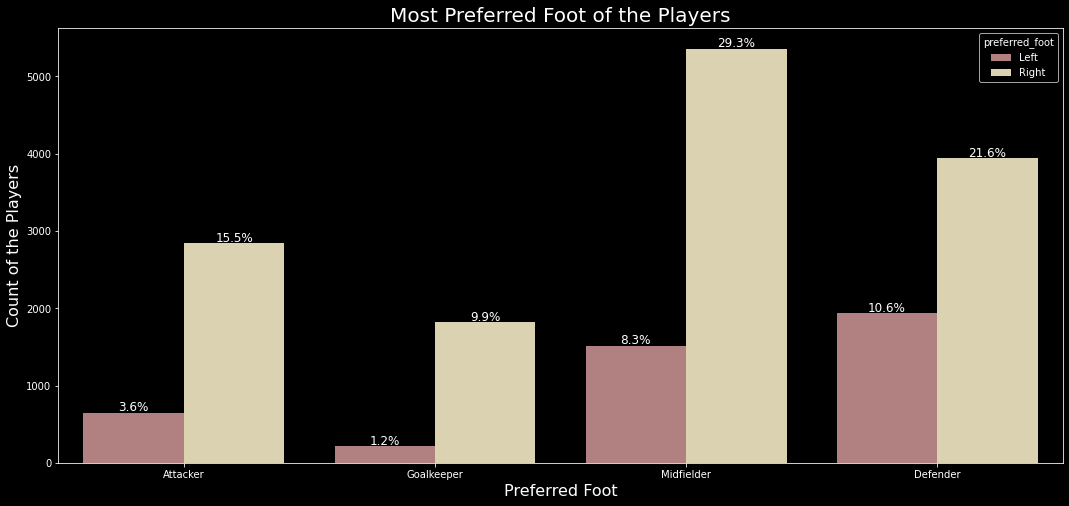

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Preferred Foot vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.style.use('dark_background')
plt.figure(figsize = (18, 8))
ax = sns.countplot(data['positions'],hue = data['preferred_foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.xlabel('Preferred Foot', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)

patches(ax, data.positions,0)

<font color=skyblue>📝📝 The preffered foot by the most players is Right.</font>

## <font color=green>Representation of share of international reputation</font>

				 📈📈📈📈📈 Distribution of International Reputation vs Players  📈📈📈📈📈



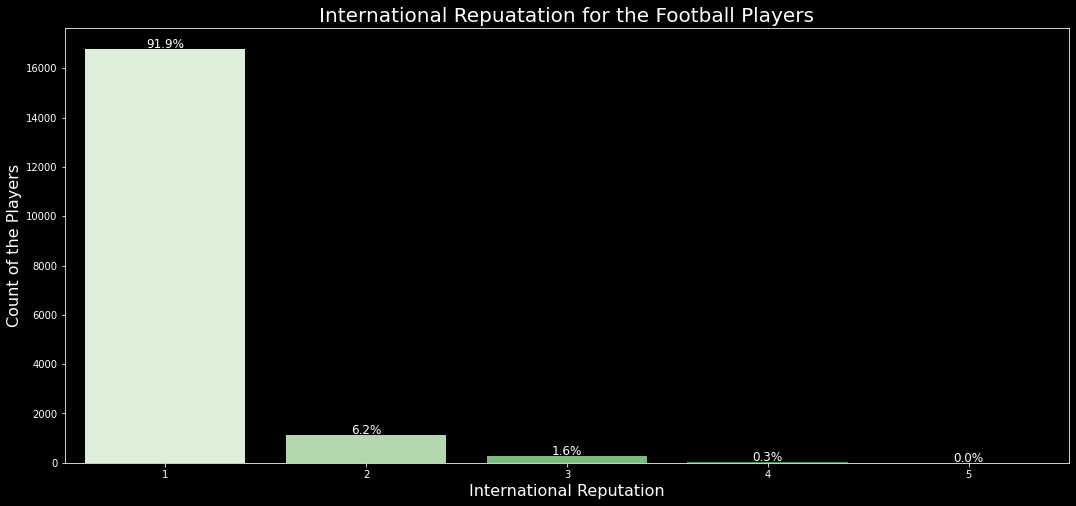

In [ ]:
#collapse 

print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of International Reputation vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.countplot(data['international_reputation'], palette = 'Greens')
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.xlabel('International Reputation', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)

patches(ax, data.international_reputation,0)

<font color=skyblue>📝📝 Around 92% of the players have international reputation as 1 and 6.2% have 2, making it around 98% of the total no. of players.</font>

## <font color=green>Different positions acquired by the players </font>

				 📈📈📈📈📈 Distribution of Positions vs Players  📈📈📈📈📈



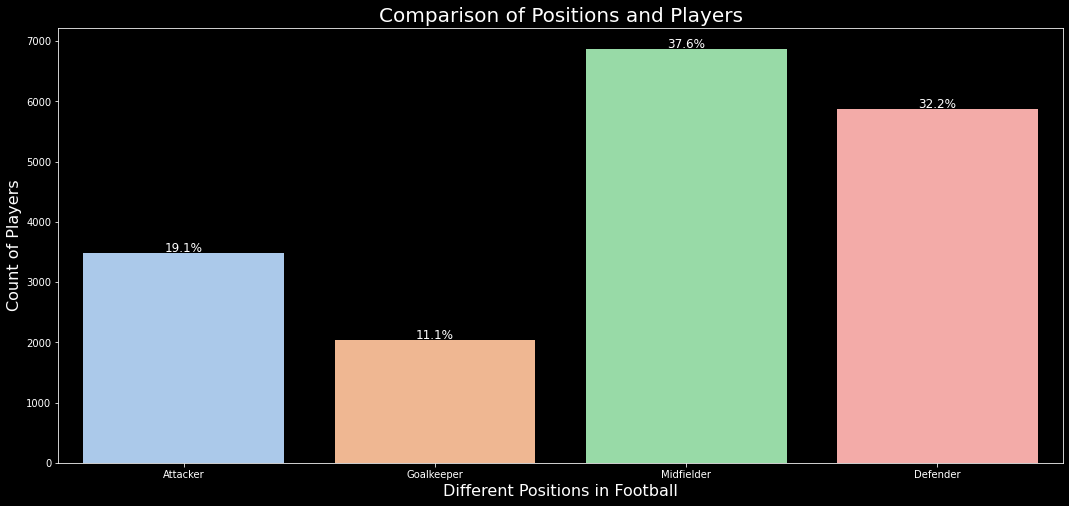

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Positions vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.countplot('positions', data = data, palette = 'pastel')
plt.xlabel('Different Positions in Football', fontsize = 16)
plt.ylabel('Count of Players', fontsize = 16)
plt.title('Comparison of Positions and Players', fontsize = 20)

patches(ax, data.positions,0)

<font color=skyblue>📝📝 Our dataset is divided into 4 major categories of player postions in which 19% of the players are Attackers, around 38% of the players are Midfielders, 32% are Defenders and 11% are Goalkeepers.</font>

## <font color=green>Comparing the players' Wages</font>

				 📈📈📈📈📈 Distribution of Wage vs Players  📈📈📈📈📈



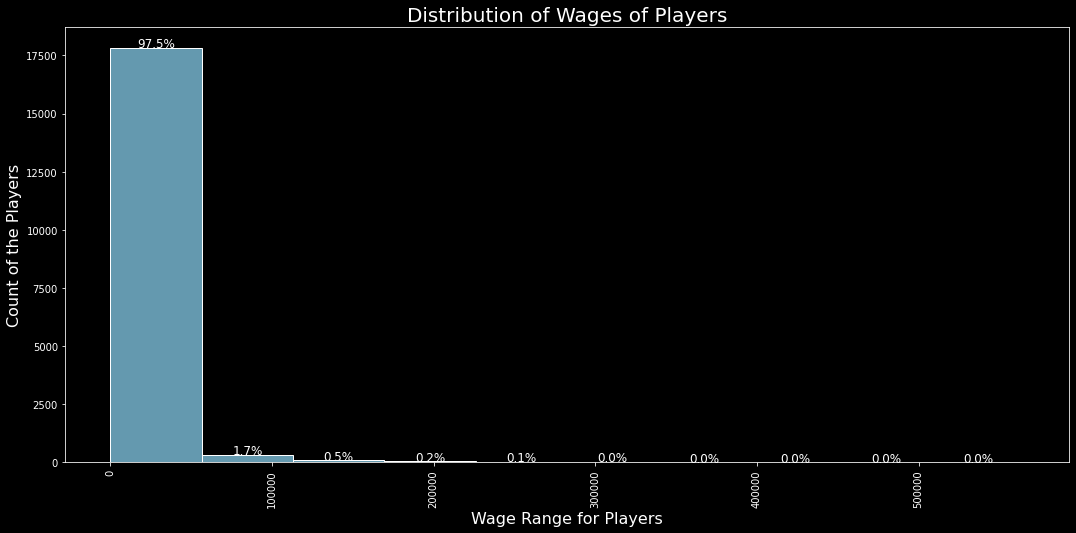

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Wage vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.histplot(data['wage_eur'], color = 'skyblue',bins=10)
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)

patches(ax, data.wage_eur,0)

<font color=skyblue>📝📝 98% of the players have wages less than 0.1 million Euros</font>

### <font color=orange>Player with highest Wage</font>

In [ ]:
#collapse 
top_wage_player = data.loc[data.wage_eur == data['wage_eur'].max(),'short_name']
print('The player with the highest wage is', top_wage_player.values[0])

The player with the highest wage is L. Messi


## <font color=green>Comparing the players' Valuation</font>

				 📈📈📈📈📈 Distribution of Valuation vs Players  📈📈📈📈📈



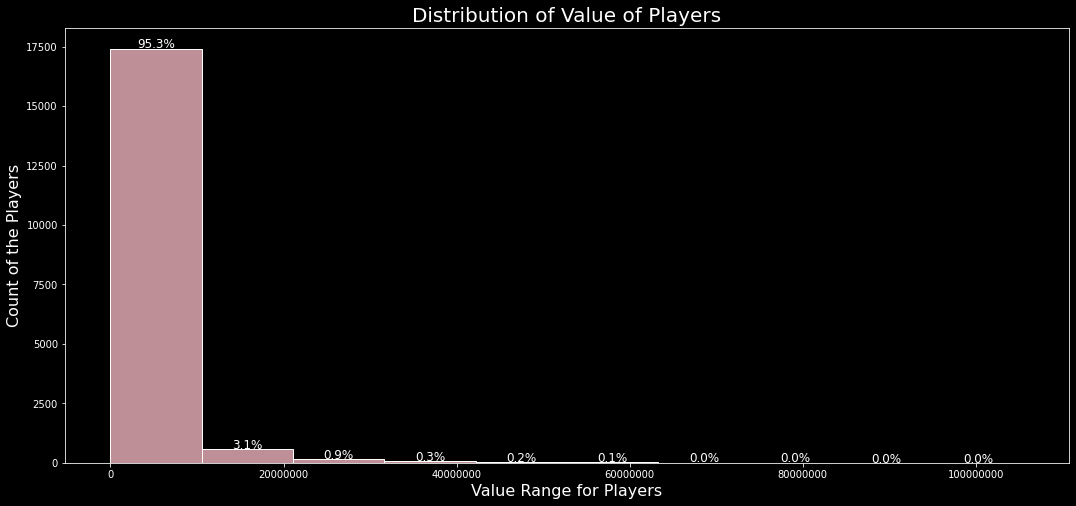

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Valuation vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.histplot(data['value_eur'], color = 'pink',bins=10)
plt.xlabel('Value Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Value of Players', fontsize = 20)
plt.ticklabel_format(axis="x", style='plain')

patches(ax, data.value_eur,0)

<font color=skyblue>📝📝 95% of the players have valuation under 10 million Euros and 3% players have more valuation between 10-20 million Euros</font>

### <font color=orange>Most expensive player</font>

In [ ]:
#collapse 
most_expensive_player = data.loc[data.value_eur == data['value_eur'].max(),'short_name']
print('The most expensive player is', most_expensive_player.values[0])


The most expensive player is Neymar Jr


### <font color=orange>Age vs Valuations</font>

In [ ]:
#collapse 
# grouping the players on the basis of age
data['age_group'] = pd.cut(data['age'], bins = [data['age'].min(), 20, 25,30,35,40, data['age'].max()], 
                  labels=['20 and Under', '21 to 25', '26 to 30','31 to 35','36 to 40','Over 40'])


				 📈📈📈📈📈 Distribution of Age vs Players  📈📈📈📈📈



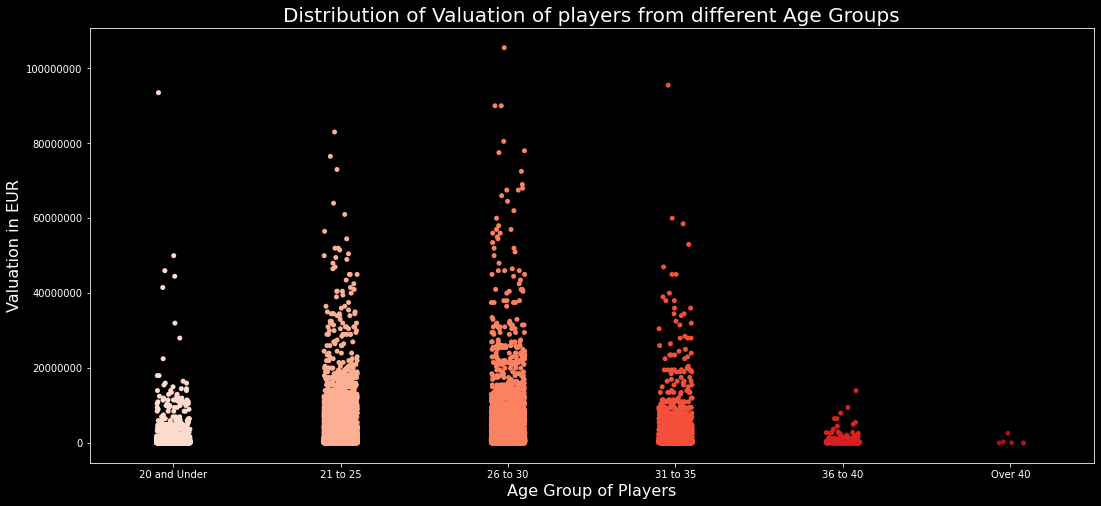

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Age vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.stripplot(x = data['age_group'], y = data['value_eur'], palette = 'Reds')
plt.xlabel('Age Group of Players', fontsize = 16)
plt.ylabel('Valuation in EUR', fontsize = 16)
plt.title('Distribution of Valuation of players from different Age Groups', fontsize = 20)

plt.ticklabel_format(axis="y", style='plain')
plt.show()

In [ ]:
#collapse 
# grouping the players on the basis of age
print('\nGrouping the players on the basis of age : \n\n'
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

players_count = data.groupby(['age_group'])['short_name'].count()
players_count.to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#139BB4'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Grouping the players on the basis of age : 

 	 👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 The valuation of the players increases with their age upto 30 years but after 30 years of age it starts decreasing. There are 5562 players who belong to the age group of 26-30 have the highest valuation.</font>

### <font color=orange>Positions vs Valuations</font>

				 📈📈📈📈📈 Distribution of Valuation vs Positions  📈📈📈📈📈



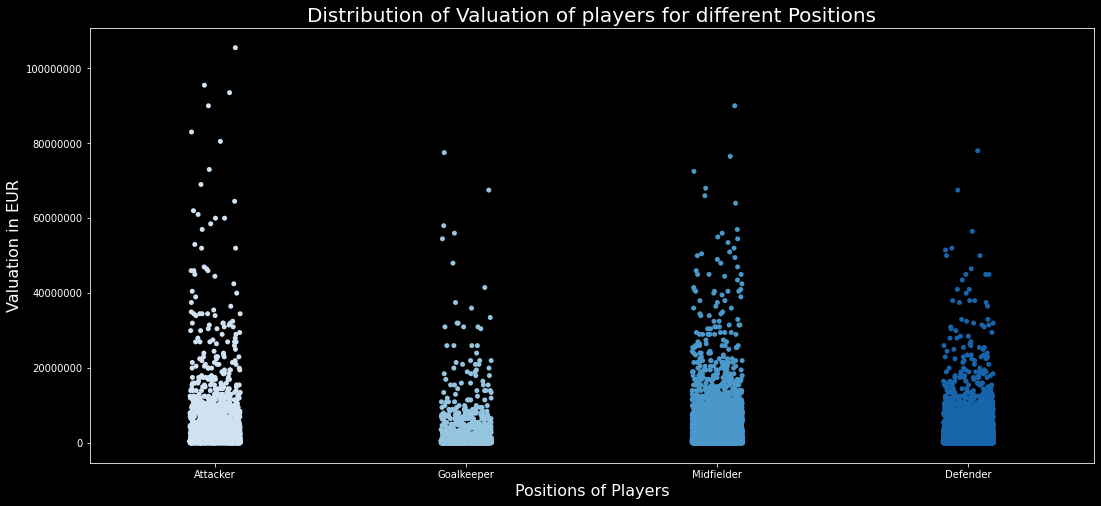

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Valuation vs Positions "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.stripplot(x = data['positions'], y = data['value_eur'], palette = 'Blues')
plt.xlabel('Positions of Players', fontsize = 16)
plt.ylabel('Valuation in EUR', fontsize = 16)
plt.title('Distribution of Valuation of players for different Positions', fontsize = 20)

plt.ticklabel_format(axis="y", style='plain')
plt.show()

In [ ]:
#collapse 
# grouping the players on the basis of positions
print('\nGrouping the players on the basis of positions : \n\n'
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

positions_count = data.groupby(['positions'])['short_name'].count()
positions_count.to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#436C3A'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Grouping the players on the basis of positions : 

 	 👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 Some of the Attackers and Midfielders are highly valued. </font>

## <font color=green>Different skill moves of players</font>

				 📈📈📈📈📈 Distribution of Skill Moves vs Players  📈📈📈📈📈



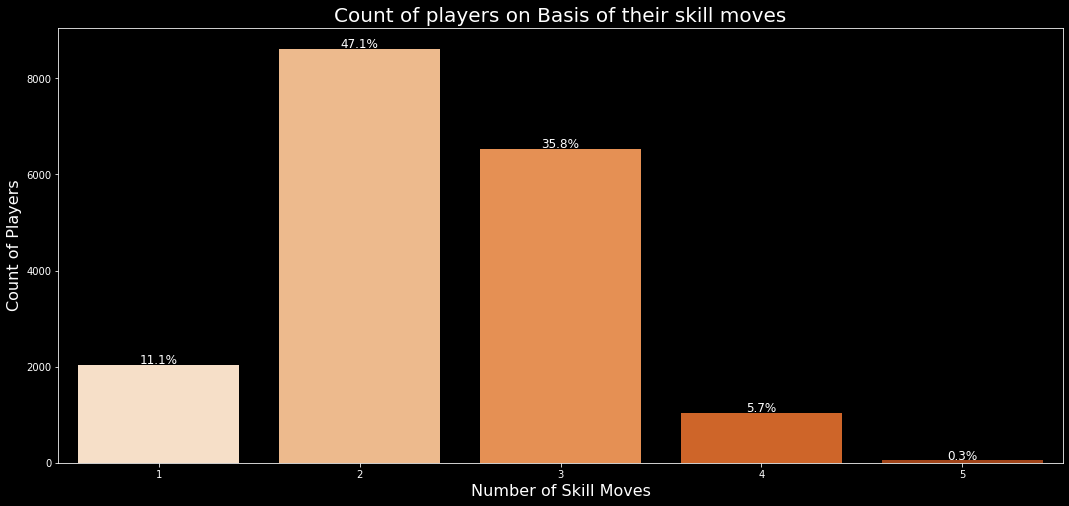

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Skill Moves vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.countplot(x = 'skill_moves', data = data, palette = 'Oranges')
plt.title('Count of players on Basis of their skill moves', fontsize = 20)
plt.xlabel('Number of Skill Moves', fontsize = 16)
plt.ylabel('Count of Players', fontsize = 16)

patches(ax, data.skill_moves,0)

<font color=skyblue>📝📝 47% of the players have 2 skill moves , around 36% of players have 3 skill moves.</font>

## <font color=green>Height of players</font>

				 📈📈📈📈📈 Distribution of Height vs Players  📈📈📈📈📈



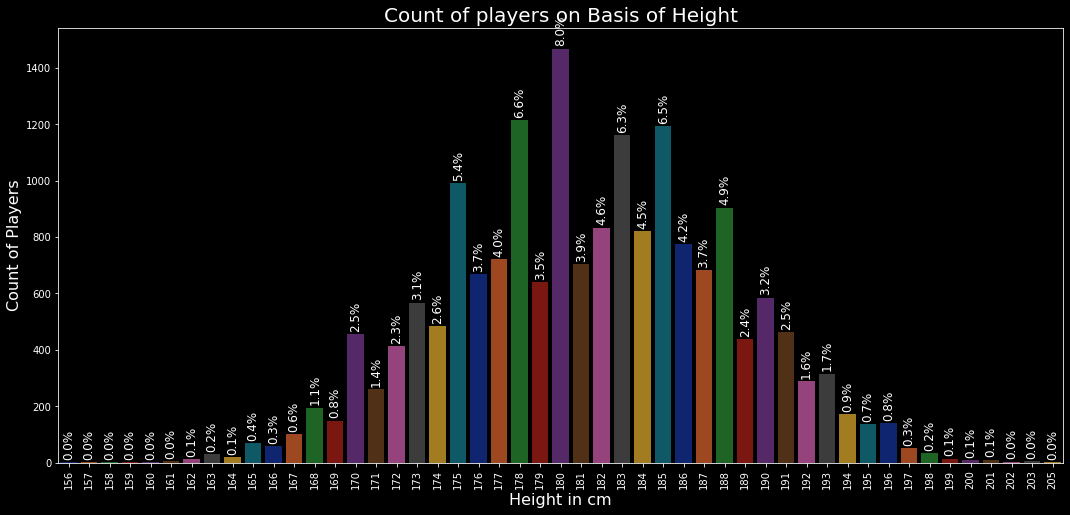

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Height vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.countplot(x = 'height_cm', data = data, palette = 'dark')
plt.title('Count of players on Basis of Height', fontsize = 20)
plt.xlabel('Height in cm', fontsize = 16)
plt.ylabel('Count of Players', fontsize = 16)
plt.xticks(rotation = 90)

patches(ax, data.height_cm,90)  

<font color=skyblue>📝📝 Almost 70% of players have height between 175cm to 188 cm .</font>

## <font color=green>Body weight of players</font>

				 📈📈📈📈📈 Distribution of Weight vs Players  📈📈📈📈📈



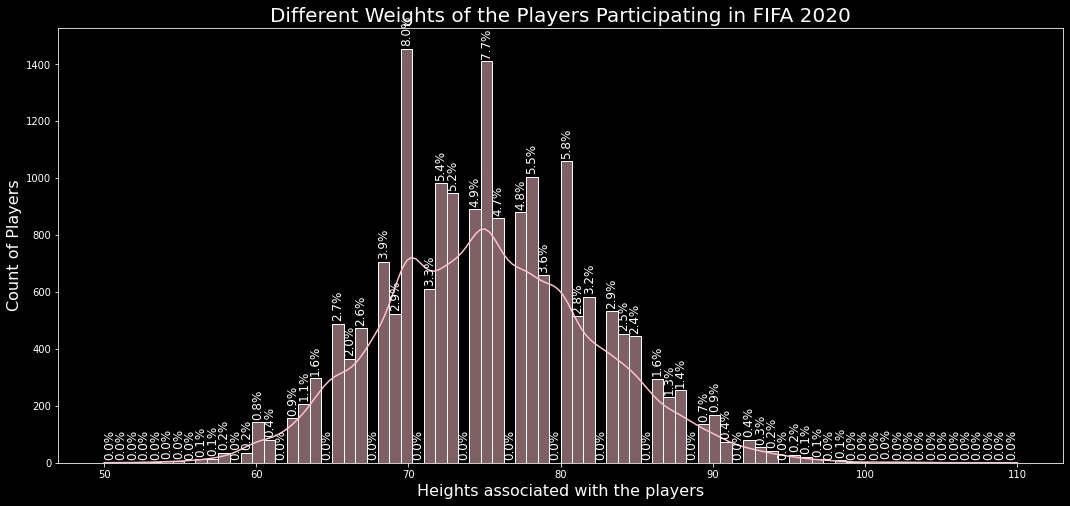

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Weight vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.histplot(data['weight_kg'],kde=True, color = 'pink')
plt.title('Different Weights of the Players Participating in FIFA 2020', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('Count of Players', fontsize = 16)

patches(ax, data.weight_kg,90)

<font color=skyblue>📝📝 60% of players have weight in the bracket of 70-80kg.</font>

## <font color=green>Work Rate of players</font>

				 📈📈📈📈📈 Distribution of Work Rate vs Players  📈📈📈📈📈



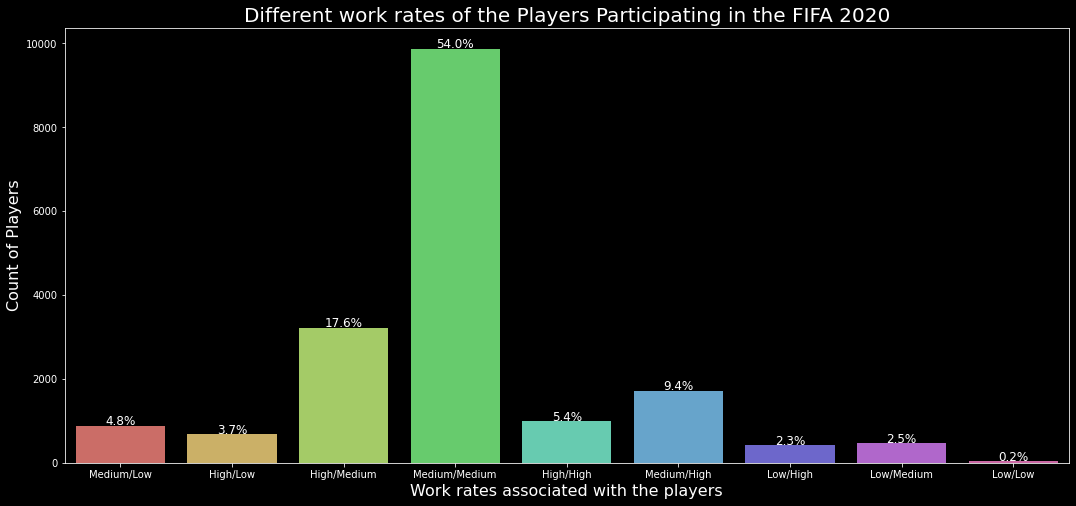

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Work Rate vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.countplot(x = 'work_rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2020', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('Count of Players', fontsize = 16)

patches(ax, data.work_rate,0)

<font color=skyblue>📝📝 90% of the players have work rates as Medium/Medium. </font>

## <font color=green>Different potential scores of the players</font>

				 📈📈📈📈📈 Distribution of Potential vs Players  📈📈📈📈📈



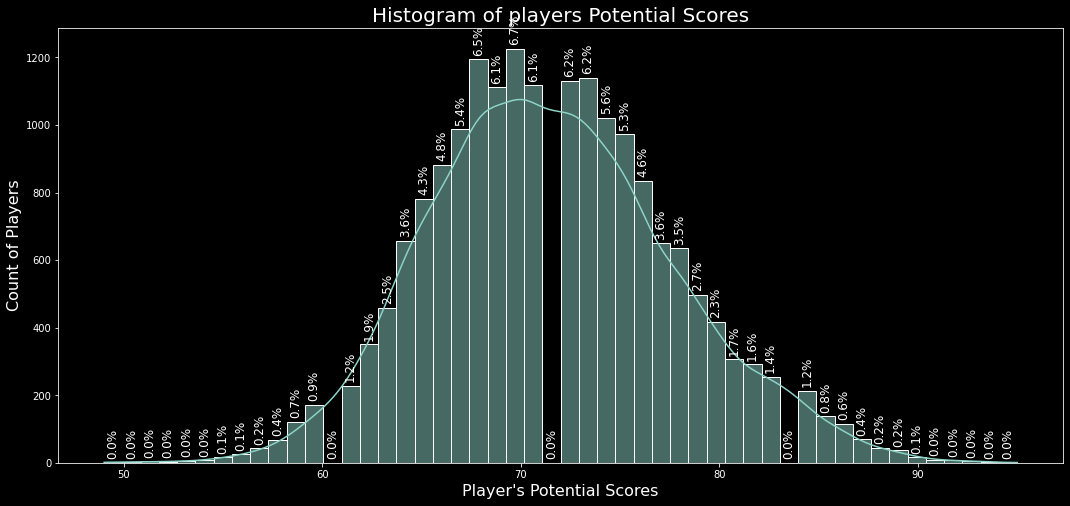

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Potential vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.histplot(data.potential, kde=True,bins = 50)
plt.xlabel("Player\'s Potential Scores", fontsize = 16)
plt.ylabel('Count of Players', fontsize = 16)
plt.title('Histogram of players Potential Scores', fontsize = 20)

patches(ax, data.potential,90)

<font color=skyblue>📝📝 Between 60-80 potential scores, 90% of players data lie. </font>

## <font color=green>Different overall scores of the players</font>

				 📈📈📈📈📈 Distribution of Overall vs Players  📈📈📈📈📈



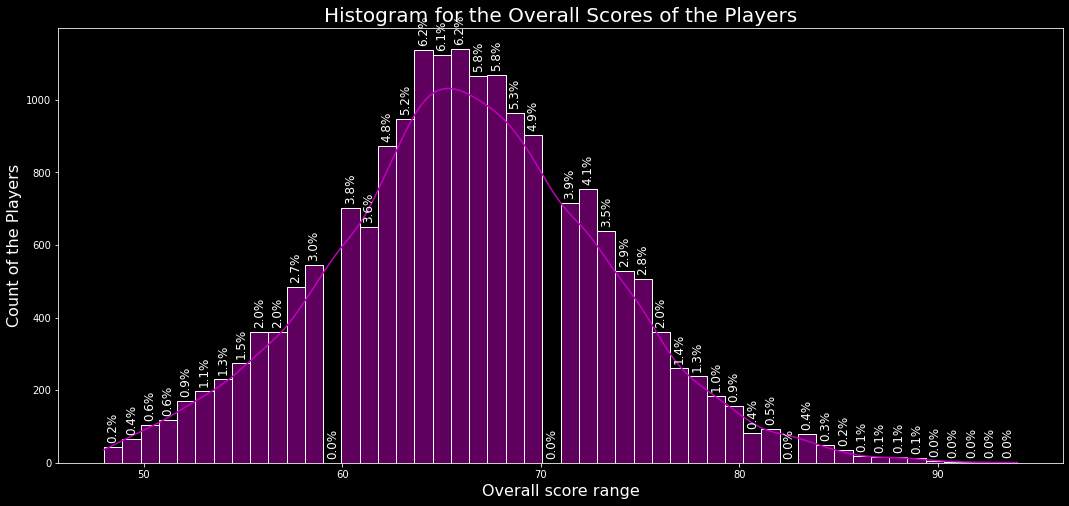

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Overall vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = sns.histplot(data.overall,kde=True,bins = 50, color = 'm')
plt.xlabel('Overall score range', fontsize = 16)
plt.ylabel('Count of the Players',fontsize = 16)
plt.title('Histogram for the Overall Scores of the Players', fontsize = 20)

patches(ax, data.overall,90)

<font color=skyblue>📝📝 Between 50-80 overall scores, 90% of players data lie. </font>

### <font color=orange>Age vs Overall Scores</font>

				 📈📈📈📈📈 Distribution of Overall vs Age  📈📈📈📈📈



<Figure size 1440x720 with 0 Axes>

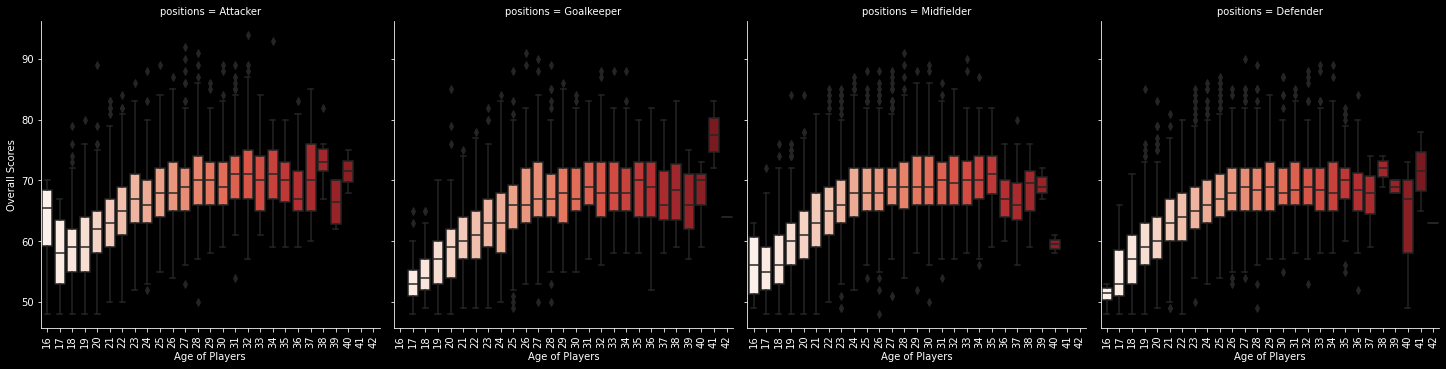

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Overall vs Age "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

fig = plt.figure(figsize = (20, 10))
ax = sns.catplot(x = 'age', y = 'overall',col='positions', data = data,kind="box", palette = 'Reds')
ax.set_axis_labels(x_var="Age of Players", y_var="Overall Scores")
ax.set_xticklabels(rotation=90)
#ax.fig.suptitle('Distribution of player Overall ratings vs Age ',fontsize = 20)
plt.show()


<font color=skyblue>📝📝 With increase in age , overall scores usually increase . 
</font>

## <font color=green>Different nations participating in FIFA 2020</font>

				 📈📈📈📈📈 Distribution of Nations vs Players  📈📈📈📈📈



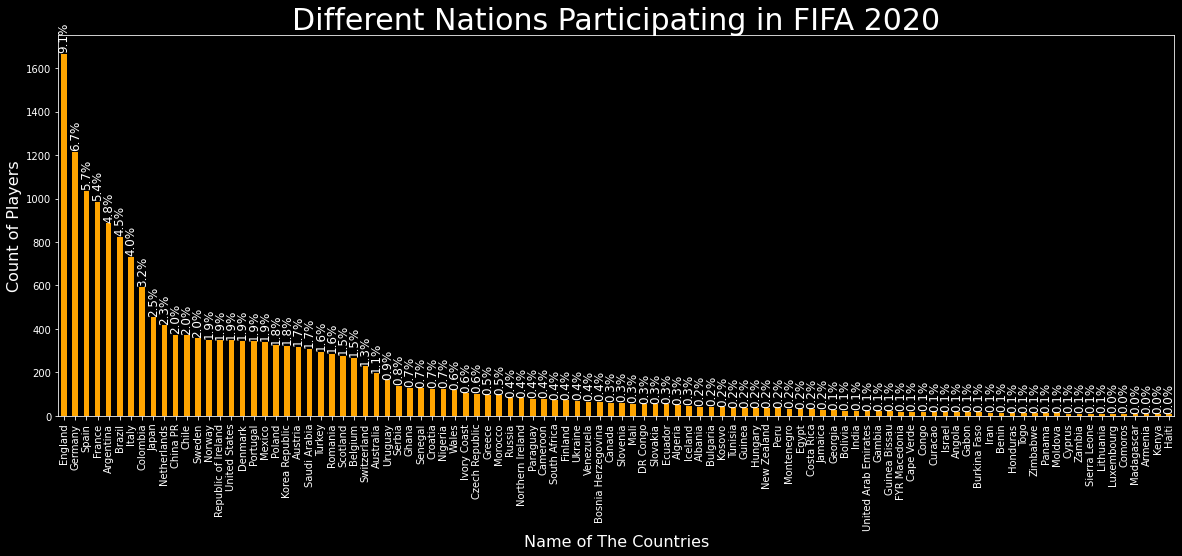

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Nations vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = data['nationality'].value_counts().head(100).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2020', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Countries',fontsize = 16)
plt.ylabel('Count of Players',fontsize = 16)

patches(ax, data.nationality,90)

<font color=skyblue>📝📝 England , Germany , Spain , France , Argentina , Brazil , Italy , Colombia – these 8 countries consist of 45% of overall data.</font>

### <font color=orange>Countries with most players</font>

In [ ]:
#collapse 
print('\nNations with most players \n\n'
,"\t ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

nationality = data['nationality'].value_counts().head(50)
nationality.to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#636A92'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Nations with most players 

 	  👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 Most of the players are from England, then Germany and then followed by Spain. </font>

### <font color=orange>Every nation's player and their weights</font>

				 📈📈📈📈📈 Distribution of Nations vs Weight  📈📈📈📈📈



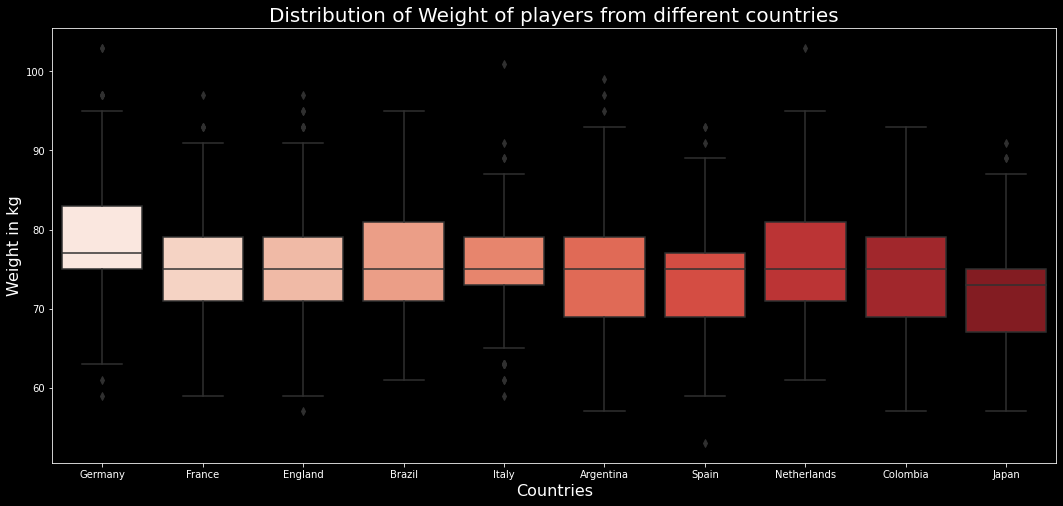

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Nations vs Weight "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

top_10_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia','Colombia','Japan','Netherlands')
data_countries = data.loc[data['nationality'].isin(top_10_countries) & data['weight_kg']]

plt.figure(figsize = (18, 8))
ax = sns.boxplot(x = data_countries['nationality'], y = data_countries['weight_kg'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 16)
ax.set_ylabel(ylabel = 'Weight in kg', fontsize = 16)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

<font color=skyblue>📝📝 Mostly European countries have avg player weight at around 77 Kg , however for Asian countries like Japan it is close to 72 Kg.</font>

## <font color=green>Different Clubs associated with players</font>

				 📈📈📈📈📈 Distribution of Clubs vs Players  📈📈📈📈📈



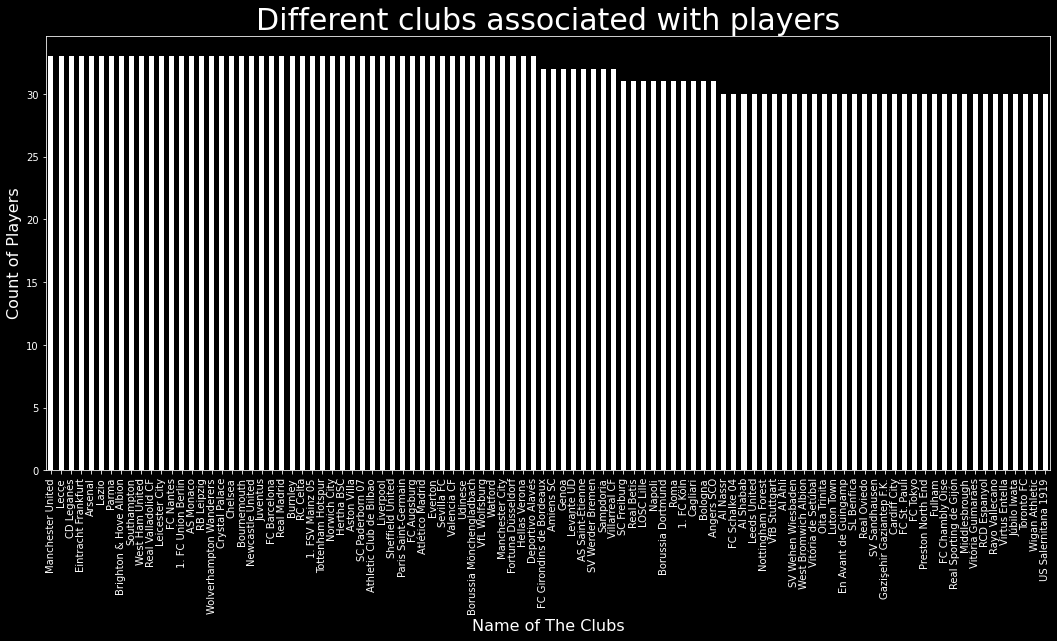

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Clubs vs Players "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize = (18, 8))
ax = data['club'].value_counts().head(100).plot.bar(color = 'white')
plt.title('Different clubs associated with players', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Clubs',fontsize = 16)
plt.ylabel('Count of Players',fontsize = 16)
plt.show()

<font color=skyblue>📝📝 Some of the clubs have 33 players, few have 32 players, few have 31 players and most of the clubs have 30 players.</font>

### <font color=orange>Popular clubs</font>

				 📈📈📈📈📈 Distribution of Overall vs Popular Clubs  📈📈📈📈📈



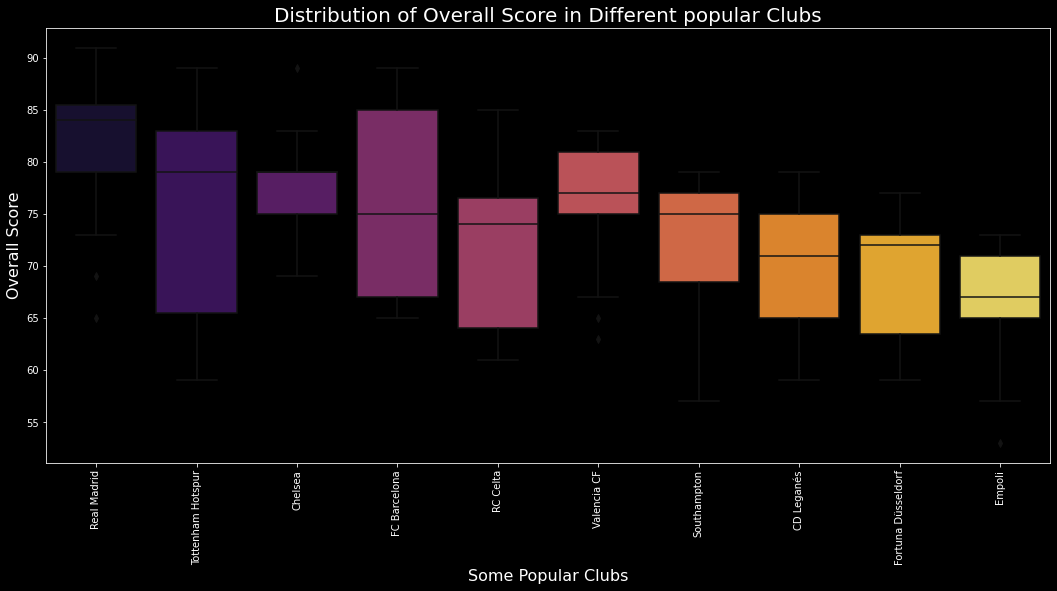

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Distribution of Overall vs Popular Clubs "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['club'].isin(some_clubs) & data['overall']]

plt.figure(figsize = (18, 8))
ax = sns.boxplot(x = data_clubs['club'], y = data_clubs['overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 16)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 16)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<font color=skyblue>📝📝 The average overall score of the popular clubs is between 70-85.</font>

### <font color=orange>Clubs which pay highest wage</font>

In [ ]:
#collapse 
print('\nNo. of Clubs'
,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")
,data.club.nunique())
print("")
print('\nClubs\n'
,"\n"
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3
,"\n"
,"\n  ",data.club.unique())



No. of Clubs 👉🏻 698


Clubs
 
 👇🏻👇🏻👇🏻 
 
   ['FC Barcelona' 'Juventus' 'Paris Saint-Germain' 'Atlético Madrid'
 'Real Madrid' 'Manchester City' 'Liverpool' 'Napoli' 'Tottenham Hotspur'
 'Manchester United' 'Chelsea' 'FC Bayern München' 'Inter'
 'Borussia Dortmund' 'Arsenal' 'Valencia CF' 'Lazio' 'Milan' 'Sporting CP'
 'Olympique Lyonnais' 'RB Leipzig' 'Ajax' 'LA Galaxy' 'Atalanta'
 'RC Celta' 'Bayer 04 Leverkusen' 'Real Betis' 'FC Porto'
 'SV Werder Bremen' 'West Ham United' 'Wolverhampton Wanderers'
 'AS Saint-Étienne' 'Torino' 'Dalian YiFang FC' 'Borussia Mönchengladbach'
 'Roma' 'Guangzhou Evergrande Taobao FC' 'SL Benfica'
 'Medipol Başakşehir FK' 'Everton' 'VfL Wolfsburg' 'Crystal Palace'
 'Getafe CF' 'Shanghai SIPG FC' 'Eintracht Frankfurt'
 'Olympique de Marseille' 'Hertha BSC' 'RSC Anderlecht' 'Villarreal CF'
 'Sampdoria' 'Leicester City' 'AS Monaco' 'Jiangsu Suning FC'
 'Los Angeles FC' 'Cagliari' 'Sevilla FC' 'Fenerbahçe SK' 'Real Sociedad'
 'TSG 1899 Hoffenheim' 'Atlético M

<font color=skyblue>📝📝 There are 698 different clubs.</font>

In [ ]:
#collapse 
clubs = data.groupby(['club'])

In [ ]:
#collapse 
print("\nNations with their maximum wage\n\n"
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

max_wage = clubs[['wage_eur','nationality']].max()
max_wage.head(100).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#053975'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Nations with their maximum wage

 		 👇🏻👇🏻👇🏻



In [ ]:
#collapse 
print("\nClubs with their maximum wage\n\n"
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

high_wage_clubs = max_wage['wage_eur'].sort_values(ascending=False).head(50)
high_wage_clubs.to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#261655'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Clubs with their maximum wage

 		 👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 The highest wage is given by FC Barcelona followed by Real Madrid and Juventus.</font>

# <font color=red>Data Preprocessing</font>

In [ ]:
#collapse 
# selecting only player's name and all numeric features
data = data[['short_name','positions','nationality','club','age', 'height_cm', 'weight_kg', 'overall', 'potential',
'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
'skill_moves', 'release_clause_eur',
'contract_valid_until', 'pace', 'shooting',
'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
'gk_positioning', 'attacking_crossing', 'attacking_finishing',
'attacking_heading_accuracy', 'attacking_short_passing',
'attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
'movement_reactions', 'movement_balance', 'power_shot_power',
'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
'mentality_aggression', 'mentality_interceptions',
'mentality_positioning', 'mentality_vision', 'mentality_penalties',
'mentality_composure', 'defending_marking', 'defending_standing_tackle',
'defending_sliding_tackle', 'goalkeeping_diving',
'goalkeeping_handling', 'goalkeeping_kicking',
'goalkeeping_positioning', 'goalkeeping_reflexes']]

<font color=skyblue>📝📝 We have selected 62 columns out of which 58 are numerical and 4 are categorical.</font>

In [ ]:
#collapse 
# Exctracting players whose overall>80
data = data[data.overall > 80]

data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#C70039'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5').highlight_max(color='#0074FF',axis=0).highlight_min(color='#00FFE5',axis=0)

<font color=skyblue>📝📝 We do not want to use 18000+ players to group so we have extracted players whose overall score is above 80 and these are 411 players.</font>

In [ ]:
#collapse 
# missing values
print('\nMissing Values in each column of the data : \n\n'
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

missing = data.isnull().sum().sort_values(ascending=False)
missing = missing.head(50)
missing = missing.to_frame()
missing.columns = ['missing_values']
missing.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Missing Values in each column of the data : 

 		 👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 There are few missing values in the extracted data and are only in the numerical features.</font>

In [ ]:
#collapse 
# replacing null with the mean
data = data.fillna(data.mean())

In [ ]:
#collapse 
# after handling missing values
print('\nAfter Imputing Missing Values in the data : \n\n'
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

missing = data.isnull().sum().sort_values(ascending=False)
missing = missing.head(50)
missing = missing.to_frame()
missing.columns = ['missing_values']
missing.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#932A06'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


After Imputing Missing Values in the data : 

 		 👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 We have repalced the missing values with the corresponding mean of the feature and now there are no missing values in the dataset.</font>

In [ ]:
#collapse 
# saving for later
names = data.short_name.tolist()
positions = data.positions.tolist()
club = data.club.tolist()
nationality = data.nationality.tolist()

In [ ]:
#collapse 
# dropping the short_name column
data = data.drop(['short_name','positions','club','nationality'],axis=1)

<font color=skyblue>📝📝 We have saved the categorical features in a list for later use and dropped from the dataset.</font>

In [ ]:
#collapse 
data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#68524B'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_max(color='#0074FF',axis=0).highlight_min(color='#00FFE5',axis=0)

# <font color=red>Clustering</font>

In [ ]:
#collapse 
# standardizing the data
def std_data(dataset):
    x = dataset.values
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    std_data.x_standardized = pd.DataFrame(x_scaled)

# Using PCA
def pca_data():
    pca = PCA(n_components = 2)
    pca_data.x_std = pd.DataFrame(pca.fit_transform(std_data.x_standardized))
    

<font color=skyblue>📝📝 We have to standardize the data as variables are measured on different scales. Then we will use PCA to reduce 62 dimensions into 2 for plot. </font>

## <font color=brown>1. K-Means Clustering</font>

In [ ]:
#collapse 
# K-Means Clustering
def kmeans_clustering(dataset,n):
    # specify the number of clusters
    kmeans = KMeans(n_clusters=n,max_iter=600)
    # fit the input data
    kmeans = kmeans.fit(pca_data.x_std)
    # get the cluster labels
    labels = kmeans.predict(pca_data.x_std)
    # centroid values
    centroids = kmeans.cluster_centers_
    # cluster values
    clusters = kmeans.labels_.tolist()
    # making a new dataframe by adding players' names,positions,club,nationality and their clusters
    kmeans_clustering.reduced = pca_data.x_std.copy()
    kmeans_clustering.reduced['cluster'] = clusters
    kmeans_clustering.reduced['name'] = names
    kmeans_clustering.reduced['positions'] = positions
    kmeans_clustering.reduced['club'] = club
    kmeans_clustering.reduced['nationality'] = nationality
    kmeans_clustering.reduced.columns = ['x', 'y', 'cluster', 'name','positions','club','nationality']
    
    ax = sns.lmplot(x="x", y="y", hue='cluster', data = kmeans_clustering.reduced, legend=False,palette = 'hls',fit_reg=False, size = 15)
    ax = plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,c='white', label='centroids')

    plt.legend()
    plt.ylim=(-10, 10)
    plt.title("K-Means Clustering",fontsize = 30)
    plt.tick_params(labelsize=15)
    plt.xlabel("PC 1", fontsize = 20)
    plt.ylabel("PC 2", fontsize = 20)
    
    
    plt.show()
    



				 📈📈📈📈📈 Plotting K-Means Clustering  📈📈📈📈📈



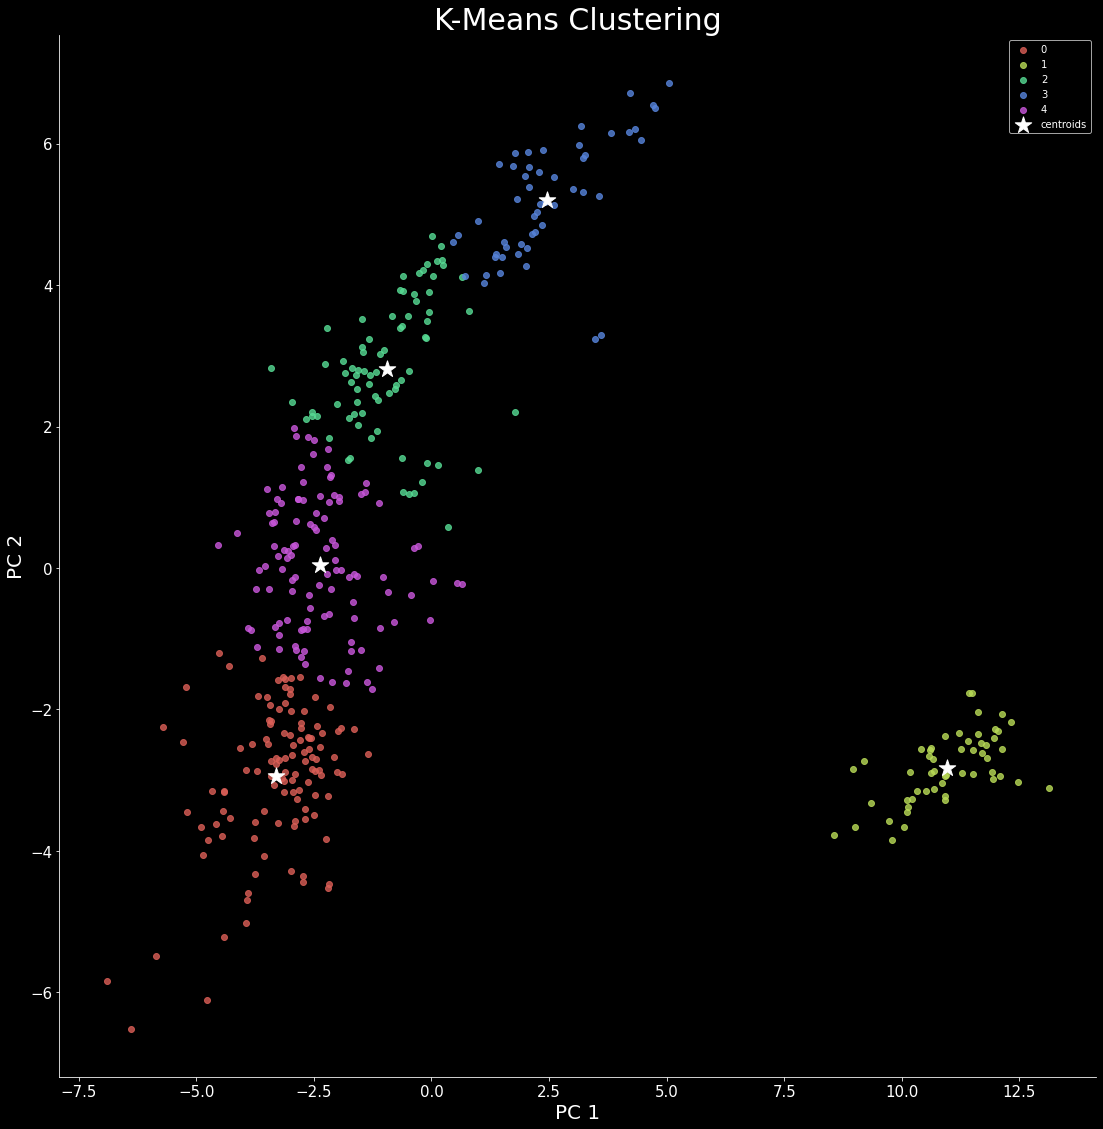

In [ ]:
#collapse 
# performing standardization
std_data(data)

# performing PCA
pca_data()

print()
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Plotting K-Means Clustering "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

# performing k-means clustering and specifying 5 clusters
kmeans_clustering(data,5)

<font color=skyblue>📝📝 Clusters are formed based on the players positions. The above graph shows yhe scatter plot of the data colored by the cluster they belong to. The symbol '*' is the centroid of each cluster. </font>

In [ ]:
#collapse 
#No. of Positions in each Cluster
print('\nNo. of Positions in each Cluster : \n\n'
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

cluster_players = kmeans_clustering.reduced.groupby(['cluster'])
players_count = cluster_players['positions'].count()
players_count.to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#874E8A'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


No. of Positions in each Cluster : 

 		 👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 In first cluster there are 60 players, in second 101 players, in third 54 players, in fourth 114 players and in last 82 players.</font>

In [ ]:
#collapse 
cluster_positions = kmeans_clustering.reduced.groupby(['cluster','positions'])

In [ ]:
#collapse 
#Count of every Position in each Cluster
print('\nCount of every position in each Cluster : \n\n'
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

positions_count = cluster_positions['positions'].count()
positions_count = positions_count.to_frame()
positions_count.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#5E5373'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Count of every position in each Cluster : 

 		 👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 The third cluster contains only 54 Goalkeepers and other 4 clusters contain different no. of Attackers, Defenders and Midfielders. </font>

In [ ]:
#collapse 
#Nationwise Positions of the Players within each Cluster
print('\nNationwise Positions of the Players within each Cluster : \n\n'
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

cluster_nations = kmeans_clustering.reduced.groupby(['cluster','positions','nationality'])
nations_count = cluster_nations['nationality'].count()
nations_count = nations_count.to_frame()
nations_count.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#5E83A8'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Nationwise Positions of the Players within each Cluster : 

 		 👇🏻👇🏻👇🏻



<font color=skyblue>📝📝 From above we can see that which countries players are grouped together on the basis of their positions.</font>

In [ ]:
#collapse 
cluster_nations['nationality']

In [ ]:
#collapse 
#Clubwise Positions of the Players within each Cluster
print('\nClubwise Positions of the Players within each Cluster : \n\n'
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

cluster_clubs = kmeans_clustering.reduced.groupby(['cluster','positions','club'])
clubs_count = cluster_clubs['club'].count()
clubs_count = clubs_count.to_frame()
clubs_count.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#337F93'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Clubwise Positions of the Players within each Cluster : 

 		 👇🏻👇🏻👇🏻



### <font color=purple>Evaluation of K-Means Clustering</font>

<font color=skyblue>📝📝 Clustering analysis doesnt have a solid evaluation metric that we can use to evaluate the outcome of different clustering algorithms. In cluster-predict methodology, we can evaluate how well the models are performing based on different k clusters since clusters are used in the downstream modeling. We will discuss two metrics that may give us some intuition about k:<br>
✏️ Elbow Method<br>
✏️ Silhouette Analysis</font>

In [ ]:
#collapse 
# Standardize the data
X_std = StandardScaler().fit_transform(data)

#### <font color=purple>i. Elbow Method</font>

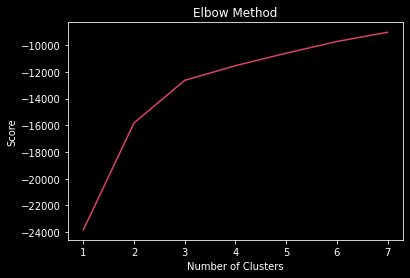

In [ ]:
#collapse 
number_clusters = range(1, 8)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(X_std).score(X_std) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score, color='#DB4462')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

<font color=skyblue>📝📝 For k=3, the curve starts to flatten out and forming an elbow.</font>

#### <font color=purple>ii. Silhouette Analysis</font>

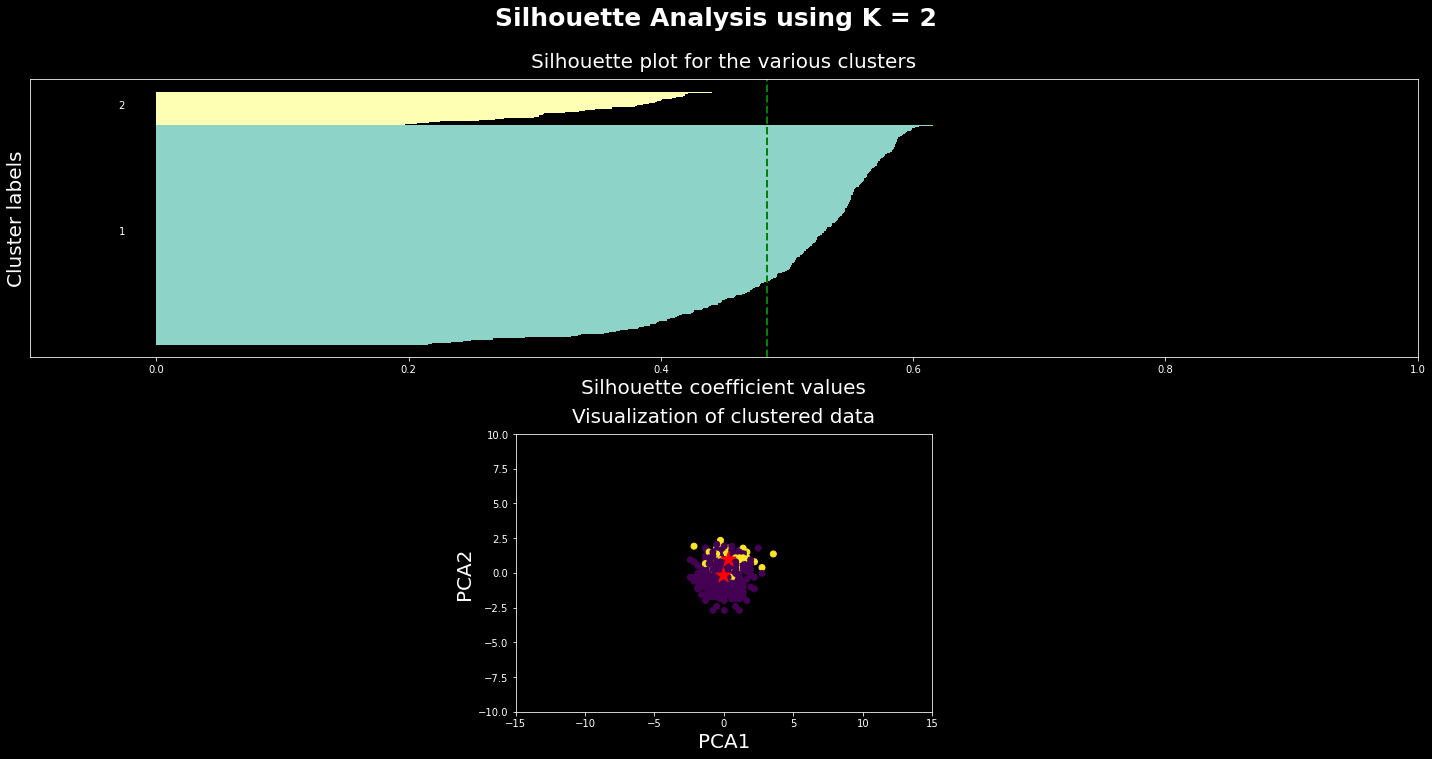

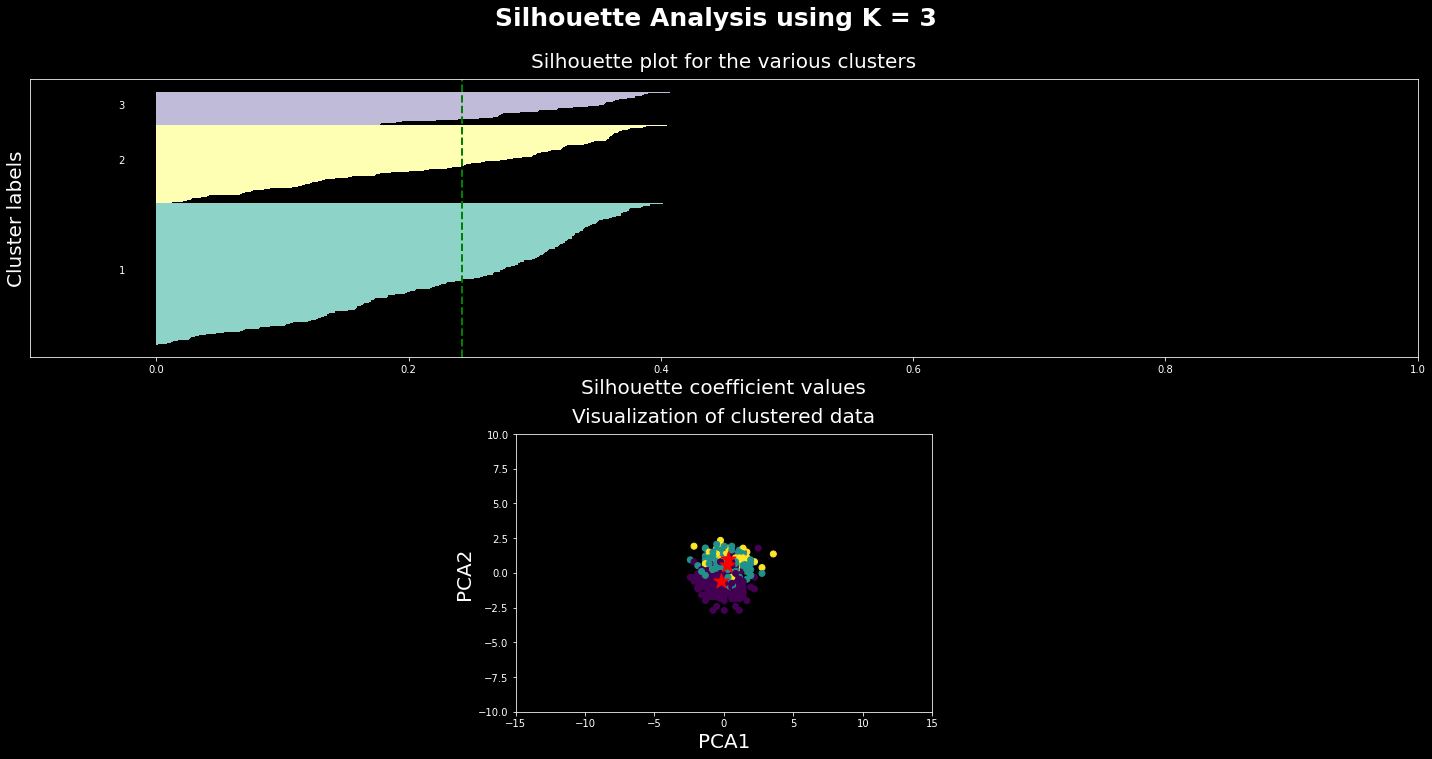

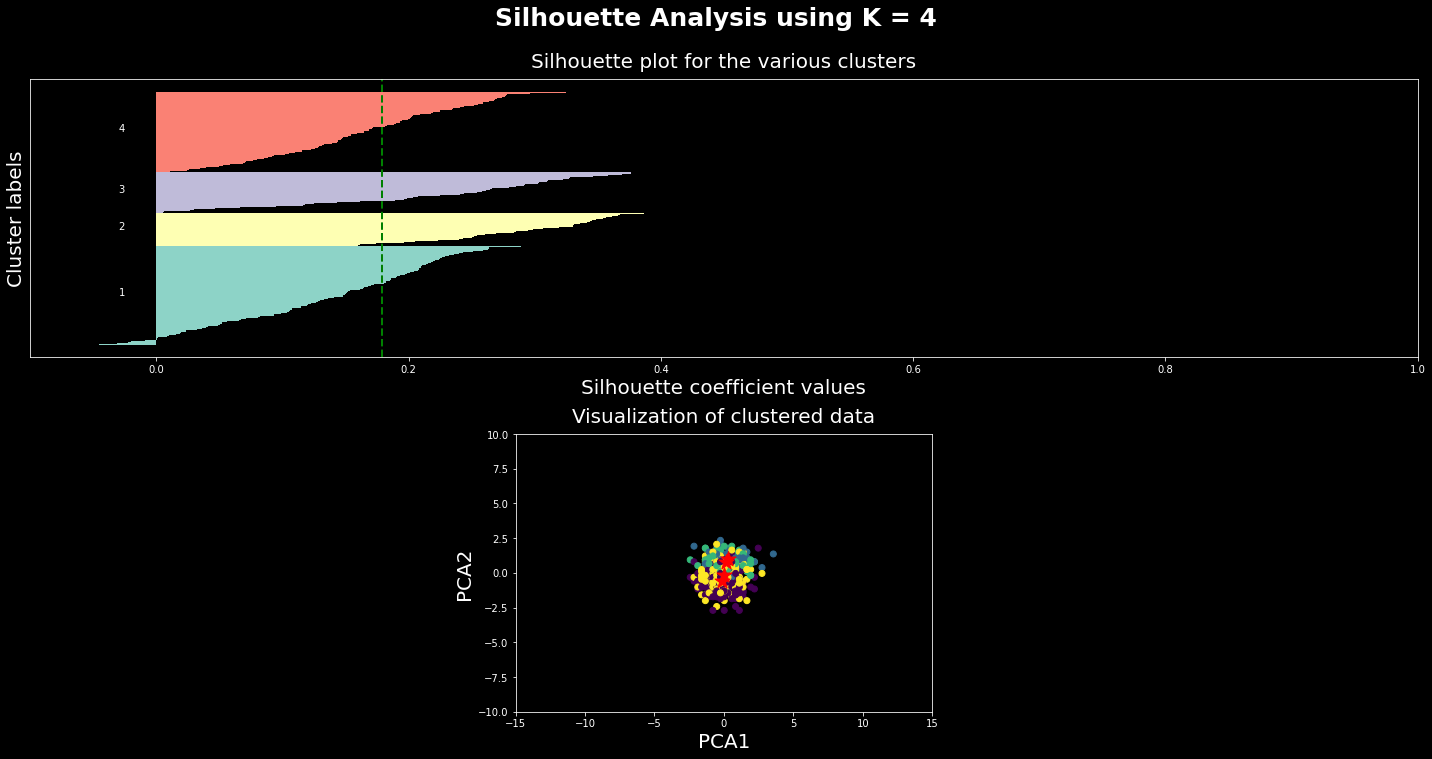

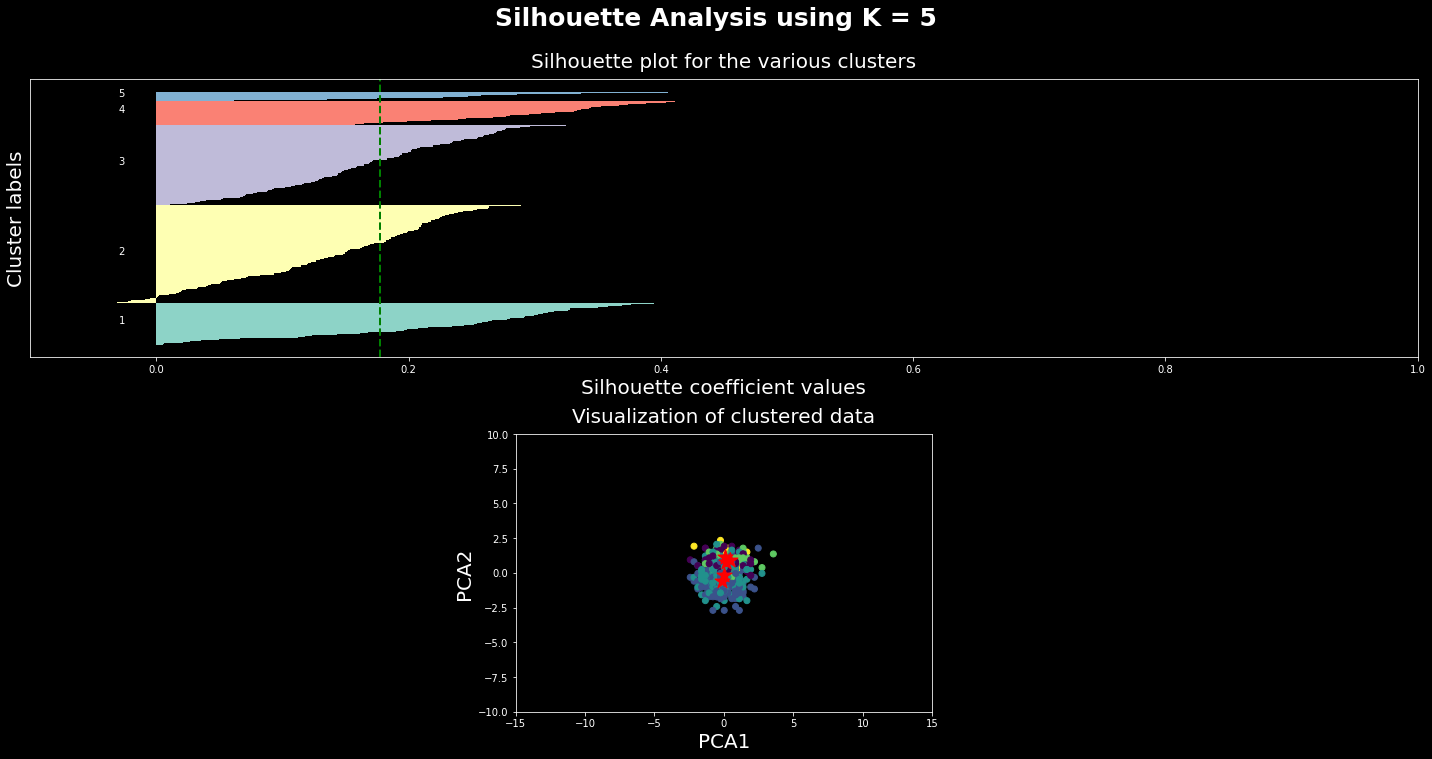

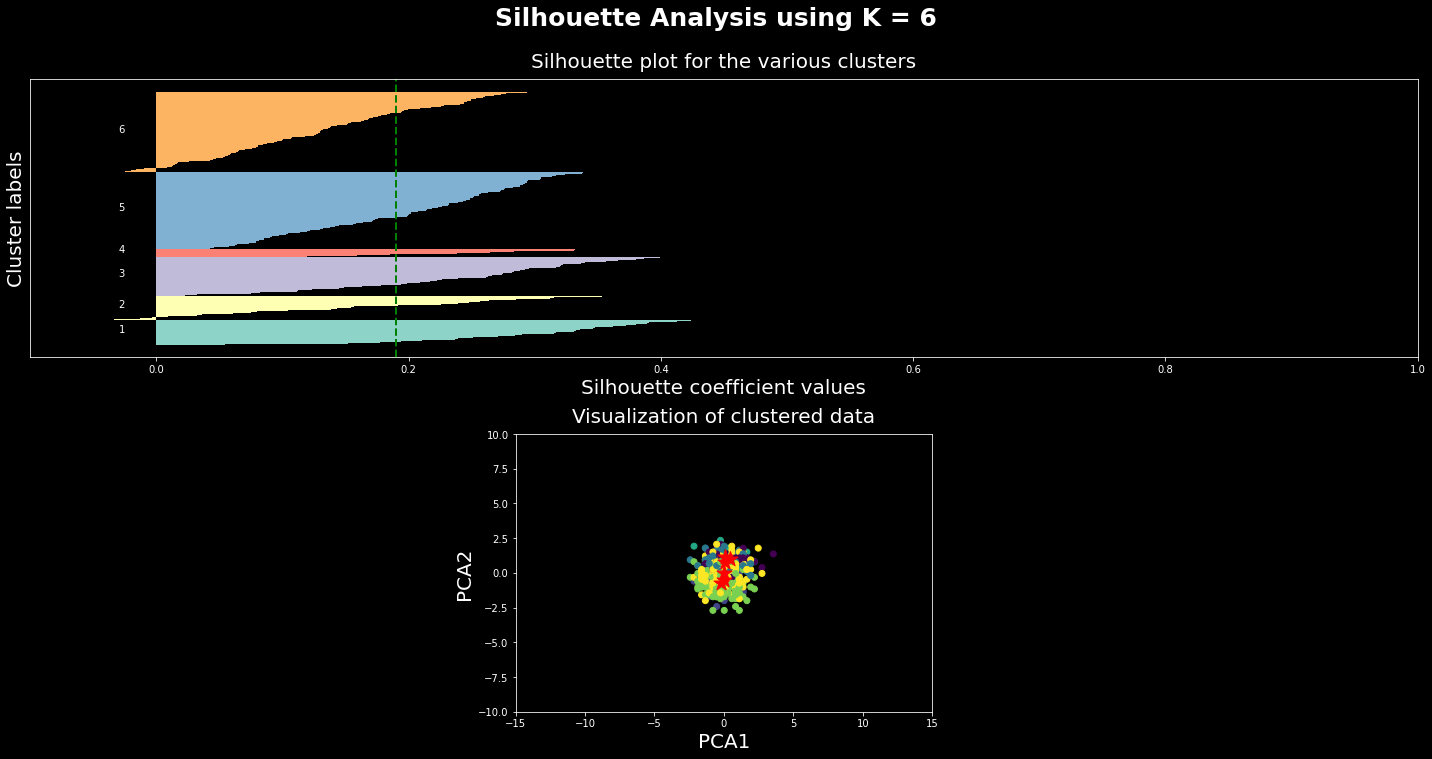

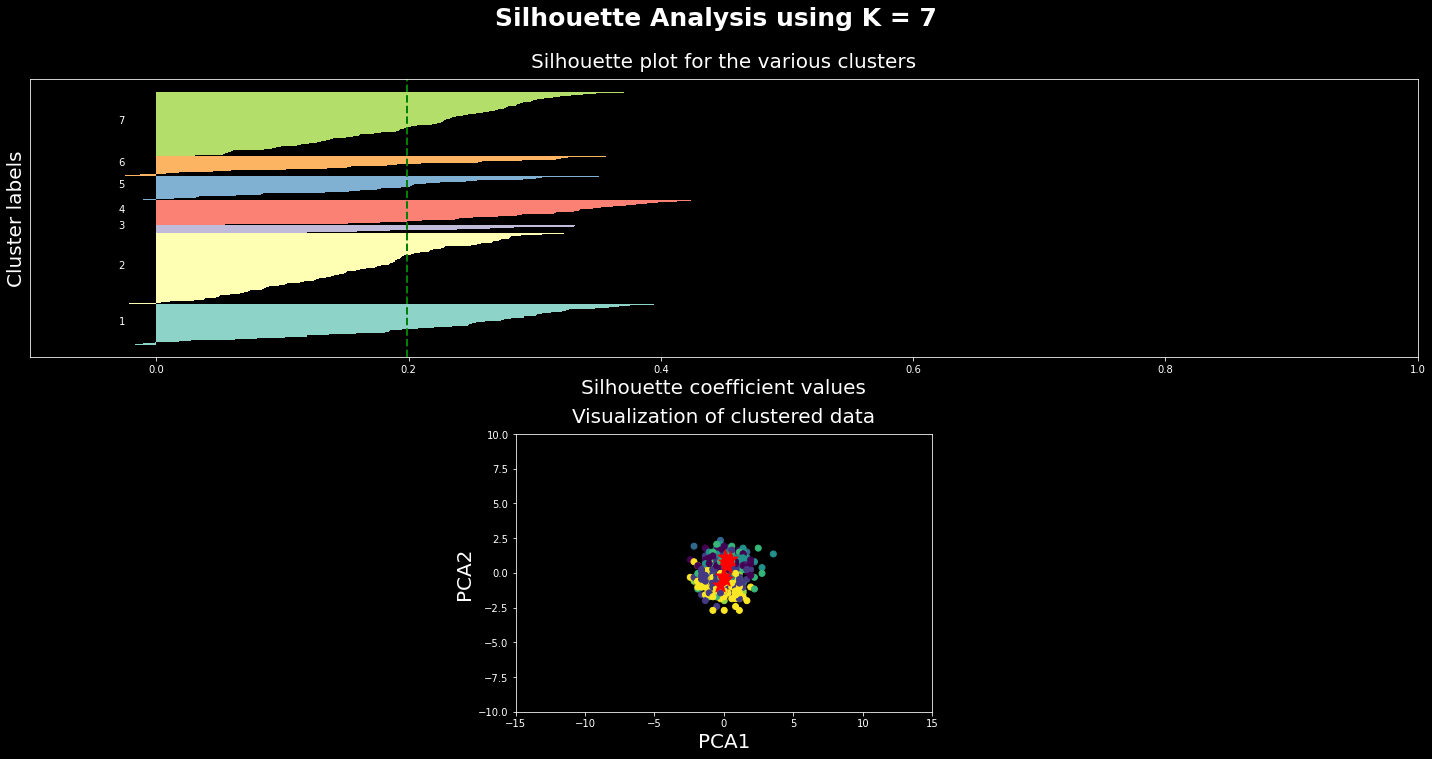

In [ ]:
#collapse 
for i, k in enumerate([2,3, 4, 5, 6,7]):
    fig, (ax1, ax2) = plt.subplots(2,1)
    fig.set_size_inches(20, 10)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values',fontsize = 20)
    ax1.set_ylabel('Cluster labels',fontsize = 20)
    ax1.set_title('Silhouette plot for the various clusters', y=1.02,fontsize = 20)
    
    # Scatter plot of data colored with labels

    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-15, 15])
    ax2.set_ylim([-10, 10])
    ax2.set_xlabel('PCA1',fontsize = 20)
    ax2.set_ylabel('PCA2',fontsize = 20)
    ax2.set_title('Visualization of clustered data', y=1.02,fontsize = 20)
    ax2.set_aspect('equal')
    
    
    plt.tight_layout()
    plt.suptitle(f'Silhouette Analysis using K = {k}',fontsize=25, fontweight='semibold', y=1.05)
    

<font color=skyblue>
📝📝 Essence of above plot : <br>
✏️ As the above plot show, n_clusters=2 has the best average silhouette score of around 0.5 and but all the clusters are not above the average shows that its not a good choice. Also the thickness of the plot gives an indication of how big each cluster is. The plot shows that cluster 1 is so much bigger than the cluster 2.<br>
✏️ However, as we increase n_cluster=3, the average silhouette score decreased to around 0.25 and all the clusters are above the average. So its a better choice than n_cluster=2.</font>

### <font color=purple>Applying K-Means with a new no. of clusters</font>

<font color=skyblue>📝📝 So we will again plot k-means clustering for n_clusters=3 as discussed above.</font>

				 📈📈📈📈📈 Plotting K-Means Clustering  📈📈📈📈📈



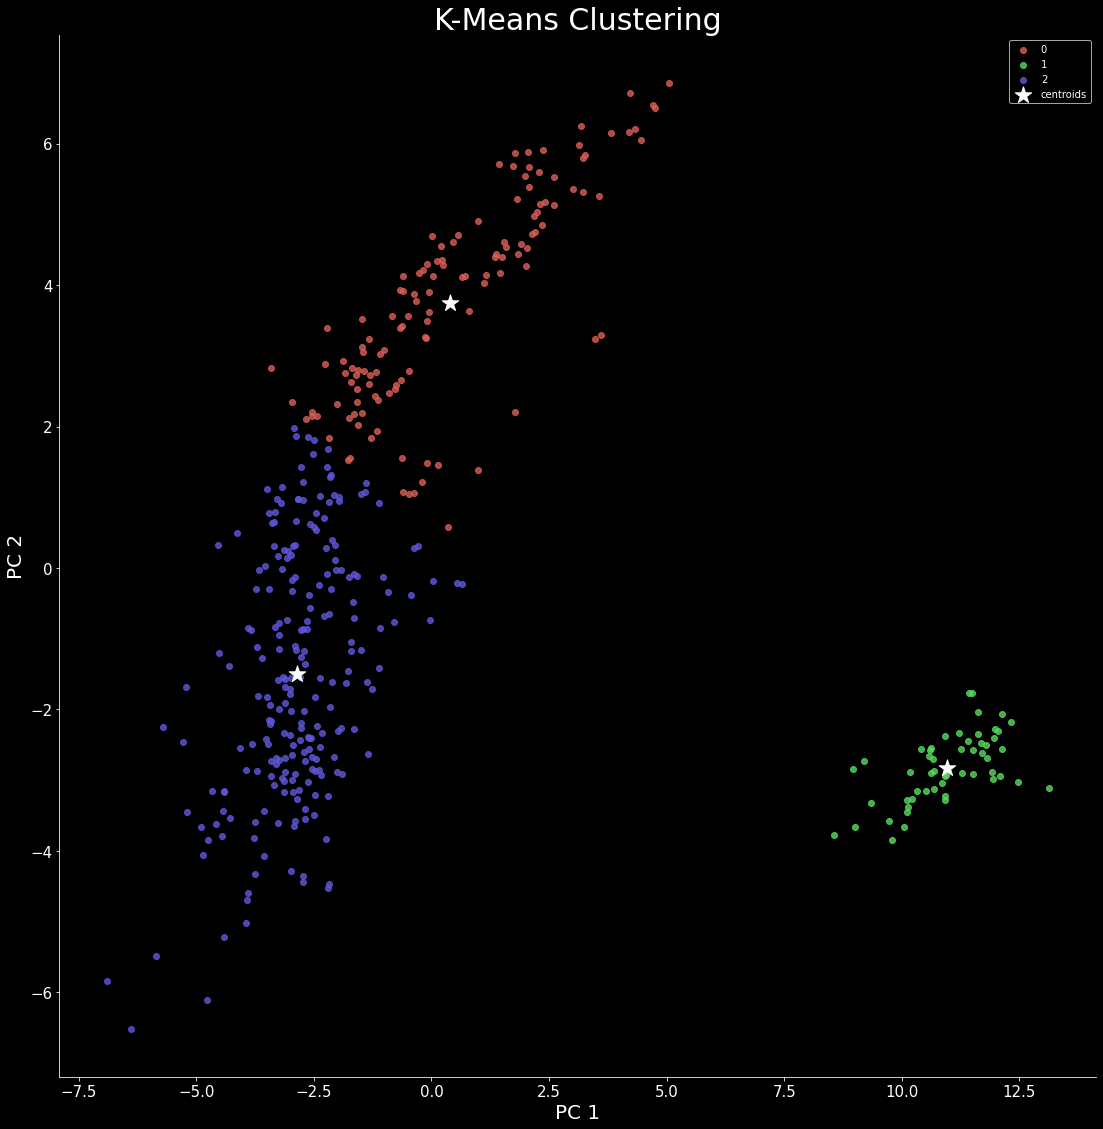

In [ ]:
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Plotting K-Means Clustering "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

kmeans_clustering(data,3)

<font color=skyblue>
📝📝 Essence of above plot : <br>
✏️ We can see three pretty distinct clusters here with particularly large separation for the green cluster indicating quite a difference in terms of the position of the players. The majority of the data is contained within the blue cluster, however.<br>
✏️ The goal of kmeans is to group data points into distinct non-overlapping subgroups. It does a very good job when the clusters have a kind of spherical shapes. However, it suffers as the geometric shapes of clusters deviates from spherical shapes. Moreover, it also doesn’t learn the number of clusters from the data and requires it to be pre-defined.</font>

## <font color=darkblue>Calculating Silhouette,Calinski Harabasz and Davies Bouldin Scores for K-means Clustering </font>

In [ ]:
#collapse 
# Fit K-Means
kmeans_1 = KMeans(n_clusters=3,random_state= 30)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(pca_data.x_std)
# Calculate cluster validation metrics
score_kmeans_s = silhouette_score(pca_data.x_std, kmeans_1.labels_, metric='euclidean')
score_kmeans_c = calinski_harabasz_score(pca_data.x_std, kmeans_1.labels_)
score_kmeans_d = davies_bouldin_score(pca_data.x_std, predictions)

r1 = pd.DataFrame({'Scores': 'Silhouette Score', 'Values' : "{:.4f}".format(score_kmeans_s)},index={'1'})
r2 = pd.DataFrame({'Scores': 'Calinski Harabasz Score', 'Values' : "{:.4f}".format(score_kmeans_c)},index={'2'})
r3 = pd.DataFrame({'Scores': 'Davies Bouldin Score', 'Values' : "{:.4f}".format(score_kmeans_d)},index={'3'})

res1 = pd.concat([r1,r2,r3])
res1.columns = ['Scores','Values']
res1=res1.style.set_table_styles(
    [{'selector': 'th',
      'props': [('background', '#34495E'),
                ('color', 'white'),
                ('font-family', 'verdana'),
                ('font-size', '10pt')]},
   
     {'selector': 'td',
      'props': [('font-family', 'verdana'),
                ('padding','0em 0em')]},
            
     {'selector': 'tr:nth-of-type(odd)',
      'props': [('background', '#ABB2B9'),
                ('color', 'black')]},
  
     {'selector': 'tr:nth-of-type(even)',
      'props': [('background', 'white'),
                ('color', 'black')]},
 
     {'selector': 'tr:hover',
      'props': [('background-color', 'pink')]},
 
     {'selector': 'th:hover',
      'props': [('font-size', '18pt')]},
   
     {'selector': 'tr:hover td:hover',
      'props': [('max-width', '1000px'),
                ('font-size', '18pt')]}

    ]
).set_properties(**{'background-color': '#FEF5E7'}, subset=['Scores'])

res1

## <font color=brown>2. Hierarchical Clustering</font>

### <font color=orange>i. Hierarchical Clustering with Average Linkage</font>

				 📈📈📈📈📈 Plotting Hierarchical Clustering with Average Linkage  📈📈📈📈📈



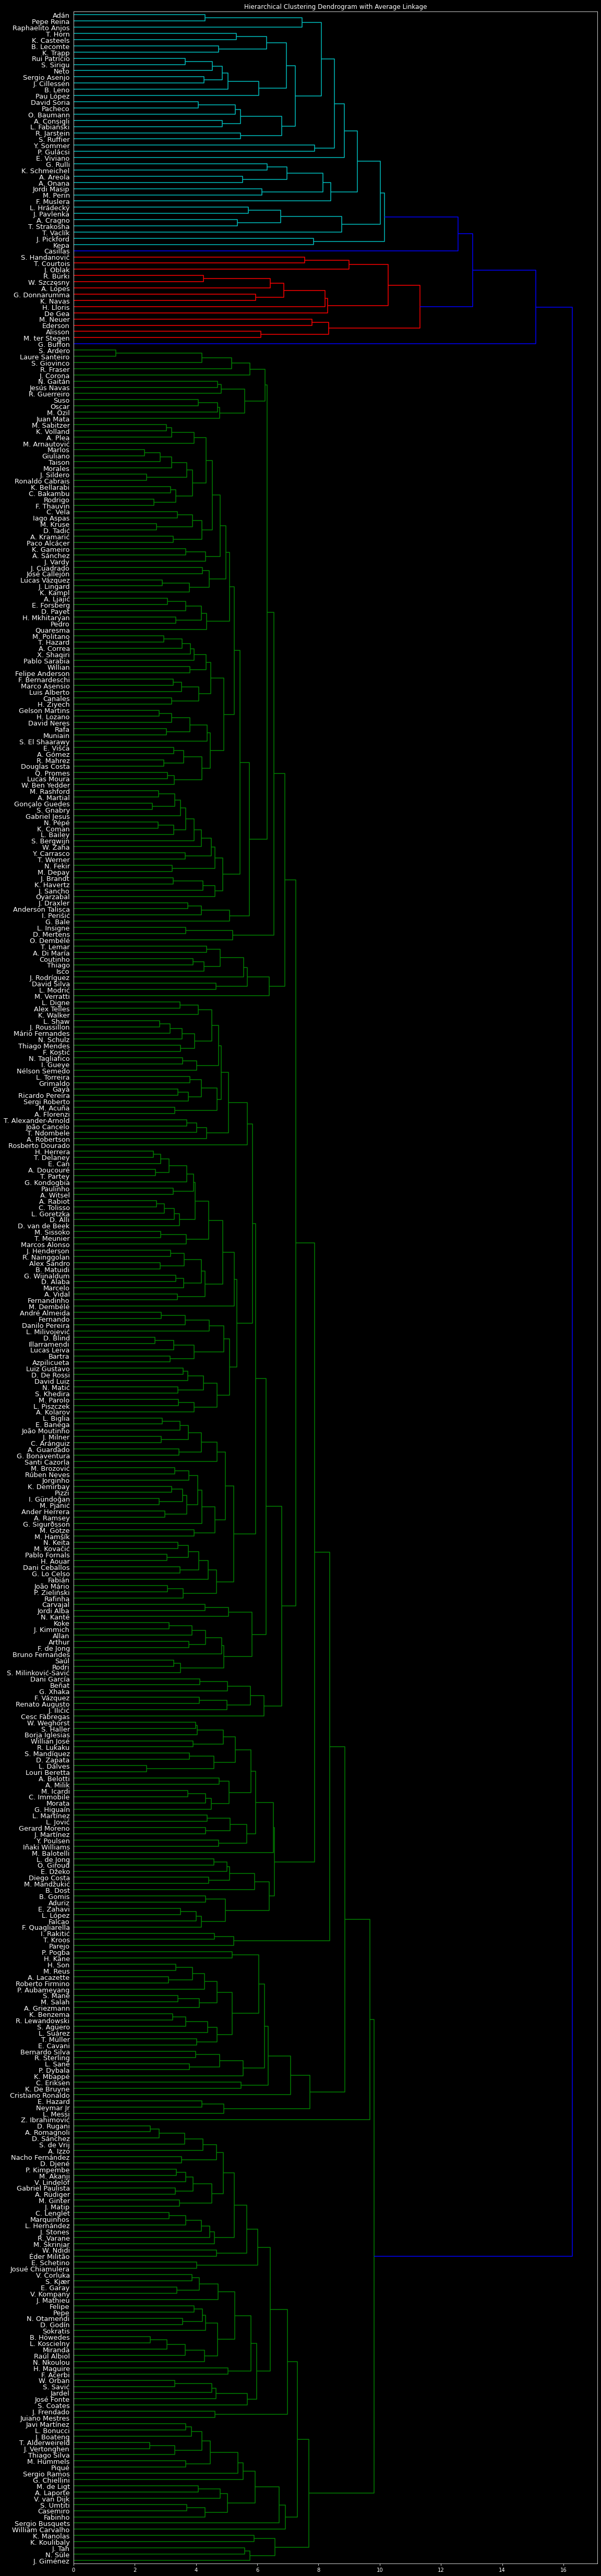

In [ ]:
# plot dendrogram using average linkage
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Plotting Hierarchical Clustering with Average Linkage "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize=(18,90))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')
dendrogram = sch.dendrogram(sch.linkage(std_data.x_standardized, method="average"), labels= names, leaf_font_size = 13, orientation='right')


<font color=skyblue>📝📝 It grouped into three positions.</font>

### <font color=orange>ii. Hierarchical Clustering with Single Linkage</font> 

				 📈📈📈📈📈 Plotting Hierarchical Clustering with Single Linkage  📈📈📈📈📈



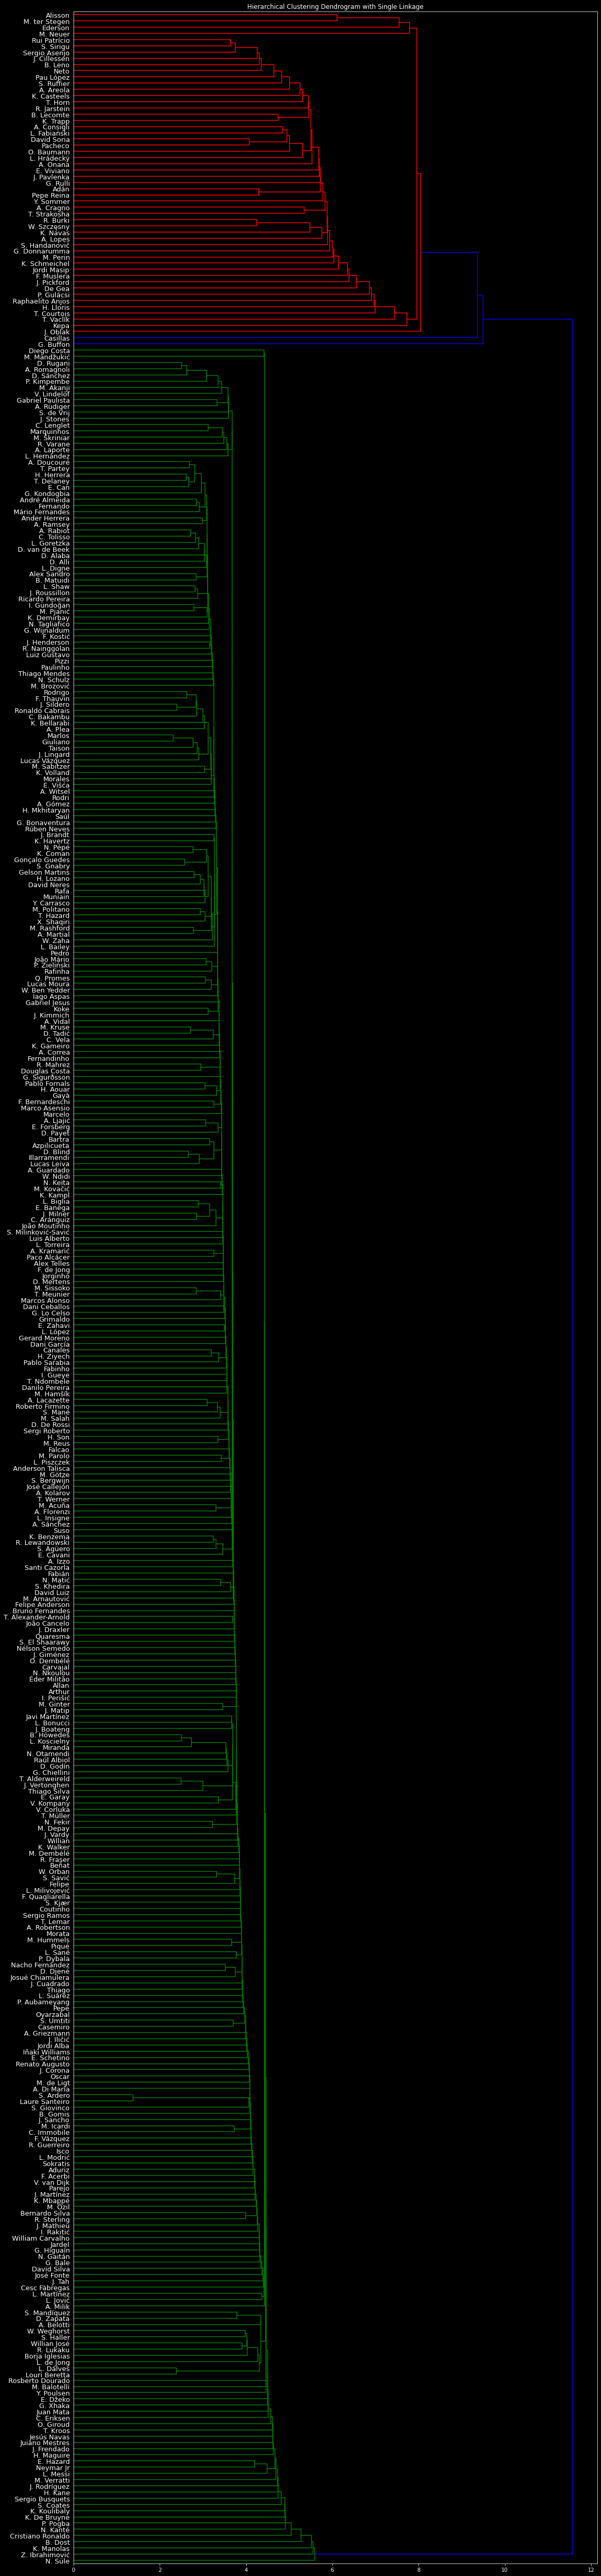

In [ ]:
# plot dendrogram using average linkage
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Plotting Hierarchical Clustering with Single Linkage "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize=(18,90))
plt.title('Hierarchical Clustering Dendrogram with Single Linkage')
dendrogram = sch.dendrogram(sch.linkage(std_data.x_standardized, method="single"), labels= names, leaf_font_size = 13, orientation='right')

<font color=skyblue>📝📝 It grouped into three positions and one group is almost negligible compared to other groups..</font>

### <font color=orange>iii. Hierarchical Clustering with Centroid Linkage</font> 

				 📈📈📈📈📈 Plotting Hierarchical Clustering with Centroid Linkage  📈📈📈📈📈



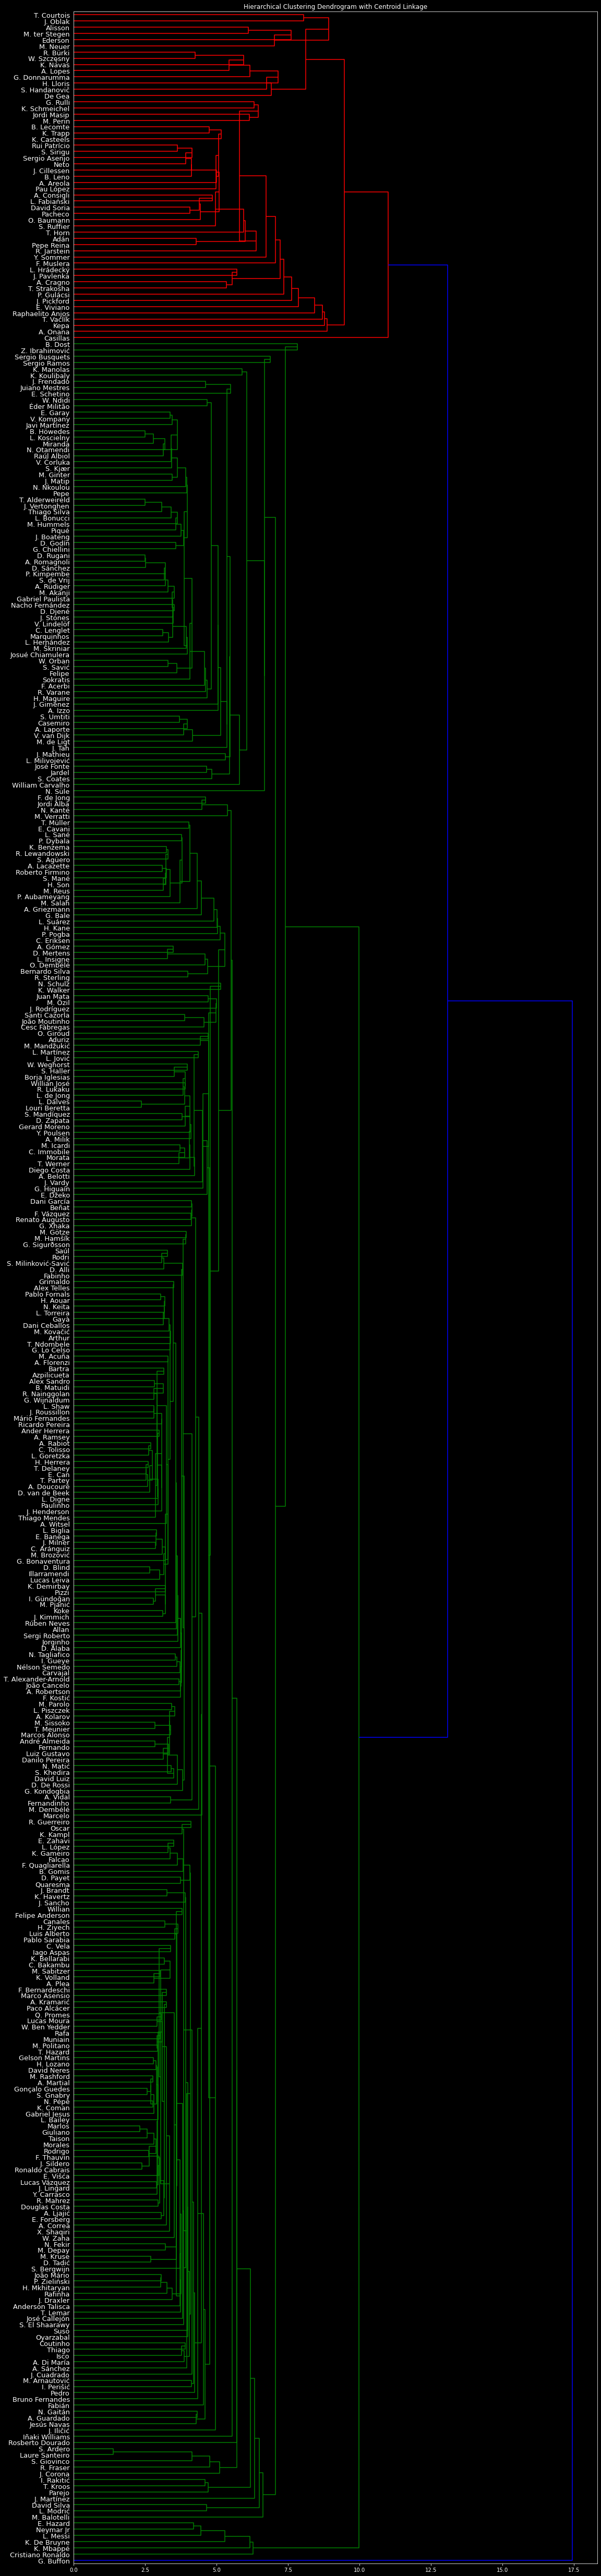

In [ ]:
# plot dendrogram using centroid linkage
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Plotting Hierarchical Clustering with Centroid Linkage "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize=(18,90))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')
dendrogram = sch.dendrogram(sch.linkage(std_data.x_standardized, method="centroid"), labels= names, leaf_font_size = 13, orientation='right')

<font color=skyblue>📝📝 It grouped into two positions.</font>

### <font color=orange>iv. Hierarchical Clustering with Complete Linkage</font> 

				 📈📈📈📈📈 Plotting Hierarchical Clustering with Complete Linkage  📈📈📈📈📈



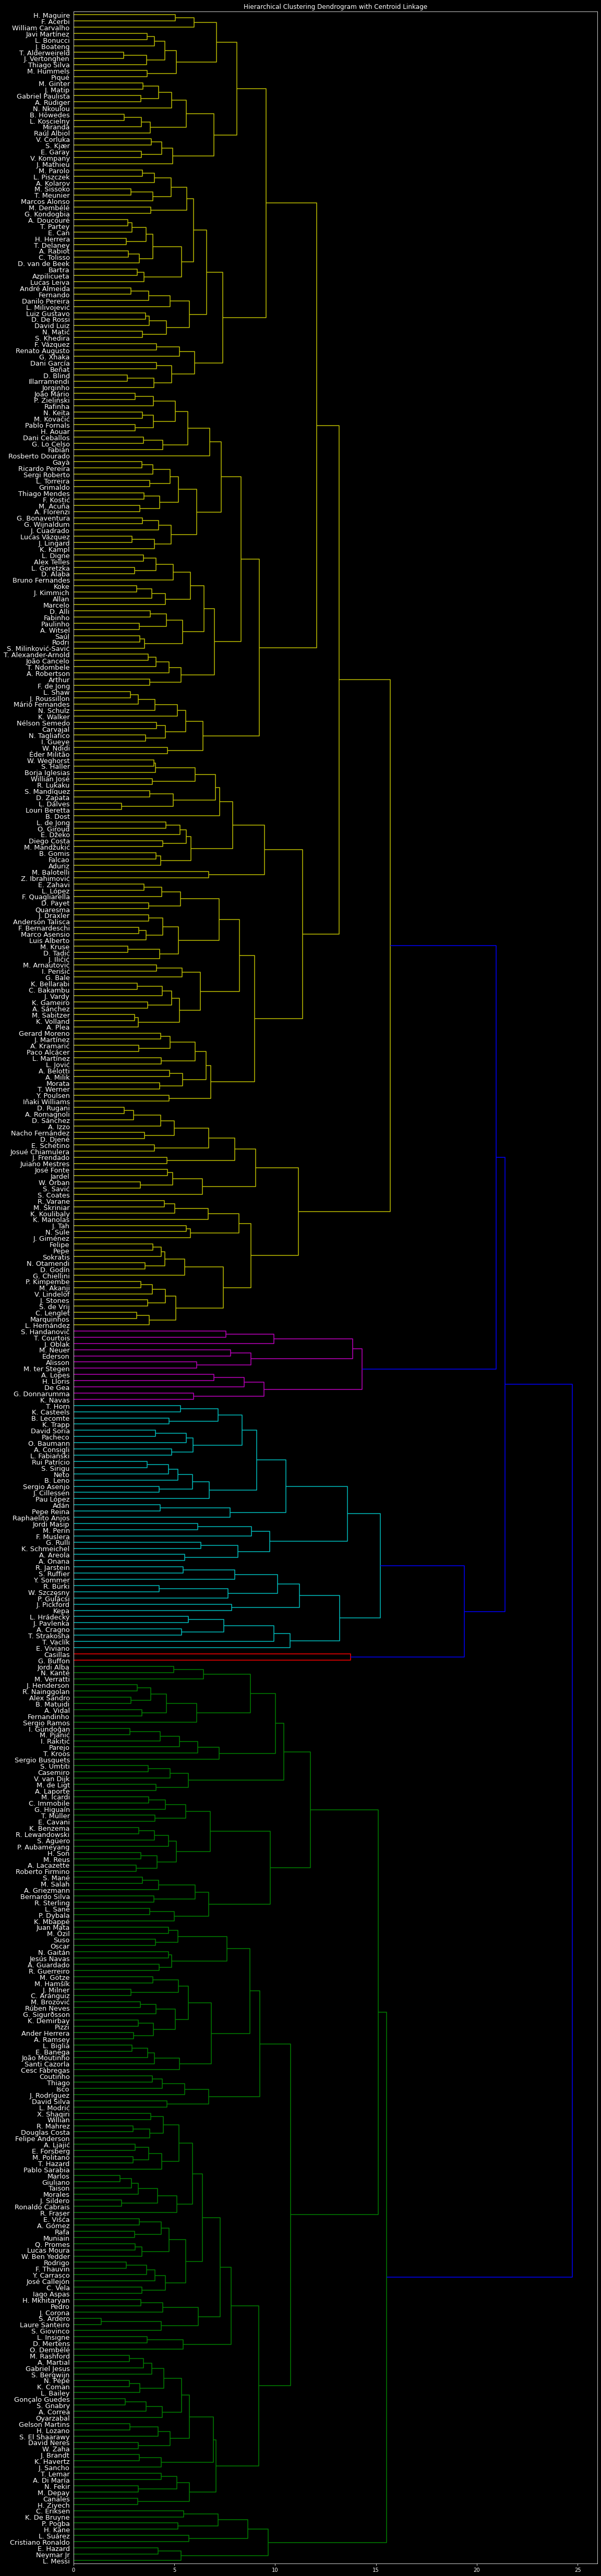

In [ ]:
# plot dendrogram using complete linkage
#collapse 
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Plotting Hierarchical Clustering with Complete Linkage "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

plt.figure(figsize=(18,90))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')
dendrogram = sch.dendrogram(sch.linkage(std_data.x_standardized, method="complete"), labels= names, leaf_font_size = 13, orientation='right')

<font color=skyblue>📝📝 It grouped into five positions. </font>

<font color=skyblue>📝📝 Hierarchical Clustering with Average Linkage groups the dataset better than single, Centroid and Complete Linkages </font>

## <font color=darkblue>Calculating Silhouette,Calinski Harabasz and Davies Bouldin Scores for Hierarchical Clustering </font>

In [ ]:
#collapse 
# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit(pca_data.x_std)
yhat_2 = model.fit_predict(pca_data.x_std)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(pca_data.x_std, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(pca_data.x_std, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(pca_data.x_std, yhat_2)

s1 = pd.DataFrame({'Scores': 'Silhouette Score', 'Values' : "{:.4f}".format(score_AGclustering_s)},index={'1'})
s2 = pd.DataFrame({'Scores': 'Calinski Harabasz Score', 'Values' : "{:.4f}".format(score_AGclustering_c)},index={'2'})
s3 = pd.DataFrame({'Scores': 'Davies Bouldin Score', 'Values' : "{:.4f}".format(score_AGclustering_d)},index={'3'})

res2 = pd.concat([s1,s2,s3])
res2.columns = ['Scores','Values']
res2=res2.style.set_table_styles(
    [{'selector': 'th',
      'props': [('background', '#34495E'),
                ('color', 'white'),
                ('font-family', 'verdana'),
                ('font-size', '10pt')]},
   
     {'selector': 'td',
      'props': [('font-family', 'verdana'),
                ('padding','0em 0em')]},
            
     {'selector': 'tr:nth-of-type(odd)',
      'props': [('background', '#ABB2B9'),
                ('color', 'black')]},
  
     {'selector': 'tr:nth-of-type(even)',
      'props': [('background', 'white'),
                ('color', 'black')]},
 
     {'selector': 'tr:hover',
      'props': [('background-color', 'pink')]},
 
     {'selector': 'th:hover',
      'props': [('font-size', '18pt')]},
   
     {'selector': 'tr:hover td:hover',
      'props': [('max-width', '1000px'),
                ('font-size', '18pt')]}

    ]
).set_properties(**{'background-color': '#FEF5E7'}, subset=['Scores'])

res2

## <font color=brown>3. DBSCAN Clustering</font>

In [ ]:
#collapse 
# performing standardization
std_data(data)

# performing PCA
pca_data()

In [ ]:
#collapse 
# DBSCAN clustering
def dbscan_clustering(e,n):
    # train the model using DBSCAN
    dbscan = DBSCAN(eps=e, min_samples=n)
    
    # the prediction for dbscan clusters
    clusters = dbscan.fit_predict(pca_data.x_std)
    
    # making a new dataframe by adding players' names,positions and their clusters
    dbscan_clustering.reduced = pca_data.x_std.copy()
    dbscan_clustering.reduced['cluster'] = clusters
    dbscan_clustering.reduced['name'] = names
    dbscan_clustering.reduced['positions'] = positions
    dbscan_clustering.reduced['club'] = club
    dbscan_clustering.reduced['nationality'] = nationality
    dbscan_clustering.reduced.columns = ['x', 'y', 'cluster', 'name','positions','club','nationality']
    
    ax = sns.lmplot(x="x", y="y", hue='cluster', data = dbscan_clustering.reduced, legend=False,palette = 'hls',fit_reg=False, size = 15)

    plt.legend()
    plt.ylim=(-10, 10)
    plt.title("DBSCAN Clustering",fontsize = 30)
    plt.tick_params(labelsize=15)
    plt.xlabel("PC 1", fontsize = 20)
    plt.ylabel("PC 2", fontsize = 20)
    
    
    plt.show()
    


				 📈📈📈📈📈 Plotting DBSCAN Clustering  📈📈📈📈📈



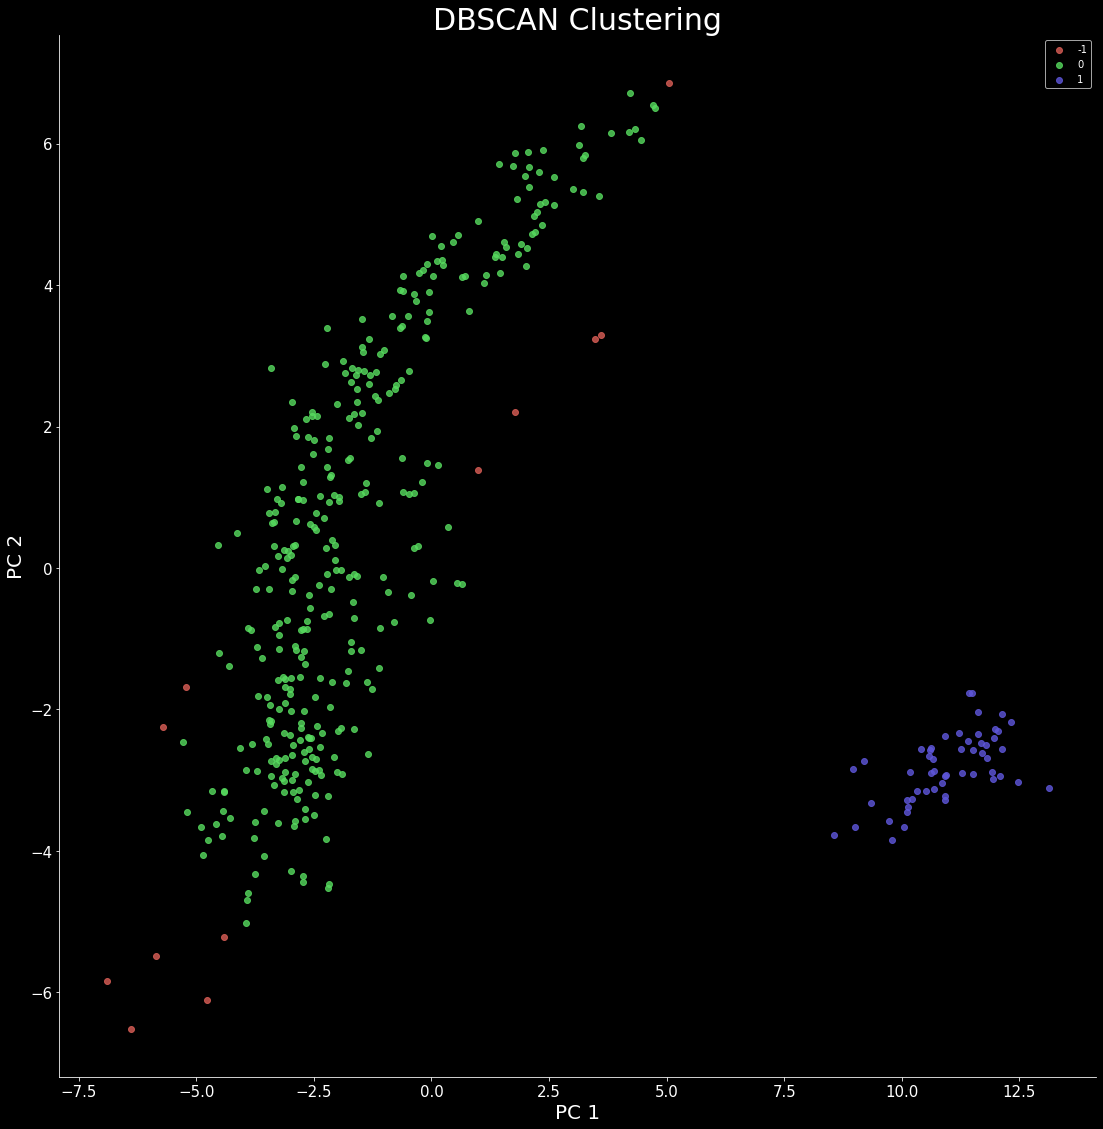

In [ ]:
#collapse 
# performing DBSCAN clustering and specifying min_samples=10 and Eps=1
print()
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Plotting DBSCAN Clustering "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

dbscan_clustering(1,10)

<font color=skyblue>📝📝 Clusters are formed into Goalkeepers vs the rest. also this plot is not very accurate.</font>

### <font color=purple>Finding an Optimal Epsilon</font>

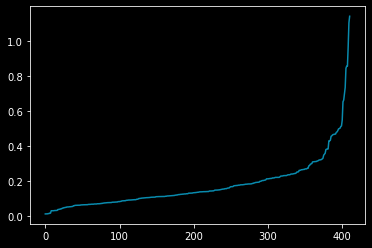

In [ ]:
#collapse 
# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor
nbrs = nn.fit(pca_data.x_std)

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(pca_data.x_std)

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances, color='#098BAE')

<font color=skyblue>📝📝 It looks like the curvature starts picking up at around eps=0.62 and can be considered as optimal epsilon for this dataset.</font>

### <font color=purple>Applying DBSCAN with a new Eps</font>


				 📈📈📈📈📈 Plotting DBSCAN Clustering  📈📈📈📈📈



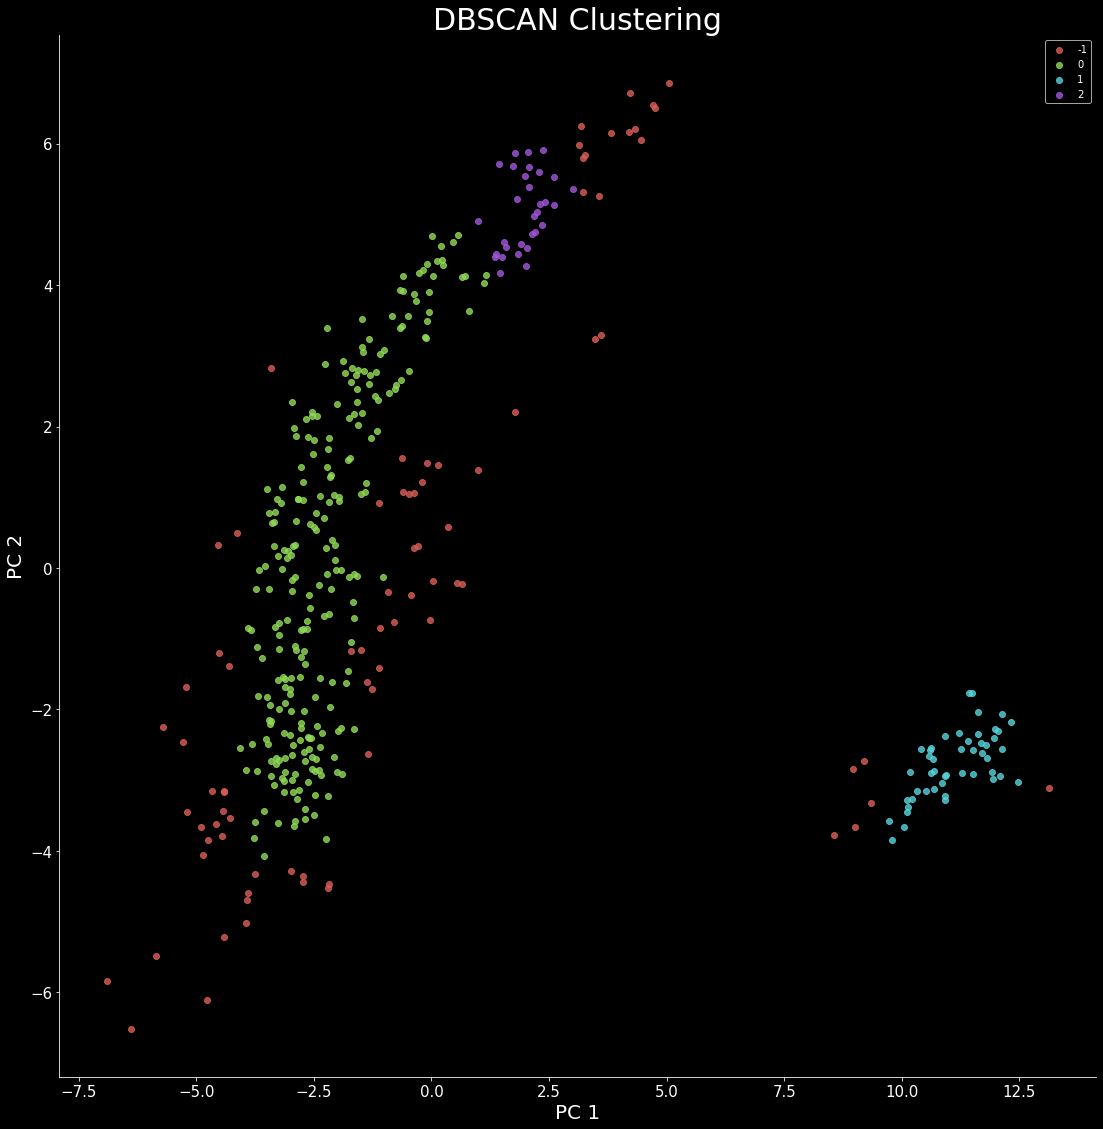

In [ ]:
#collapse 
# performing DBSCAN clustering and specifying min_samples=11 and Eps=0.62
print()
print("\t\t\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5
      ,"Plotting DBSCAN Clustering "
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*5)
print("")

dbscan_clustering(0.62,11)

<font color=skyblue>📝📝 DBSCAN with Eps = 0.62 and min_samples = 11 is doing a better job at grouping and detecting outliers.</font>

## <font color=darkblue>Calculating Silhouette,Calinski Harabasz and Davies Bouldin Scores for DBSCAN Clustering </font>

In [ ]:
#collapse 
# define the model
model = DBSCAN(eps=0.62, min_samples= 11)

# fit model and predict clusters
yhat = model.fit_predict(pca_data.x_std)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(pca_data.x_std, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(pca_data.x_std, yhat)
score_dbsacn_d = davies_bouldin_score(pca_data.x_std, yhat)

t1 = pd.DataFrame({'Scores': 'Silhouette Score', 'Values' : "{:.4f}".format(score_dbsacn_s)},index={'1'})
t2 = pd.DataFrame({'Scores': 'Calinski Harabasz Score', 'Values' : "{:.4f}".format(score_dbsacn_c)},index={'2'})
t3 = pd.DataFrame({'Scores': 'Davies Bouldin Score', 'Values' : "{:.4f}".format(score_dbsacn_d)},index={'3'})

res3 = pd.concat([t1,t2,t3])
res3.columns = ['Scores','Values']
res3=res3.style.set_table_styles(
    [{'selector': 'th',
      'props': [('background', '#34495E'),
                ('color', 'white'),
                ('font-family', 'verdana'),
                ('font-size', '10pt')]},
   
     {'selector': 'td',
      'props': [('font-family', 'verdana'),
                ('padding','0em 0em')]},
            
     {'selector': 'tr:nth-of-type(odd)',
      'props': [('background', '#ABB2B9'),
                ('color', 'black')]},
  
     {'selector': 'tr:nth-of-type(even)',
      'props': [('background', 'white'),
                ('color', 'black')]},
 
     {'selector': 'tr:hover',
      'props': [('background-color', 'pink')]},
 
     {'selector': 'th:hover',
      'props': [('font-size', '18pt')]},
   
     {'selector': 'tr:hover td:hover',
      'props': [('max-width', '1000px'),
                ('font-size', '18pt')]}

    ]
).set_properties(**{'background-color': '#FEF5E7'}, subset=['Scores'])

res3

# <font color=red>Conclusion</font>

In [ ]:
#collapse 
z1 = pd.DataFrame({'Metrics': 'Silhouette Score'
                  ,'K-Means Clustering' : "{:.4f}".format(score_kmeans_s)
                  ,'Hierarchical Clustering' : "{:.4f}".format(score_AGclustering_s)
                  ,'DBSCAN Clustering': "{:.4f}".format(score_dbsacn_s)},index={'1'})

z2 = pd.DataFrame({'Metrics': 'Calinski Harabasz Score'
                   ,'K-Means Clustering' : "{:.4f}".format(score_kmeans_c)
                   ,'Hierarchical Clustering' : "{:.4f}".format(score_AGclustering_c)
                   ,'DBSCAN Clustering': "{:.4f}".format(score_dbsacn_c)},index={'2'})

z3 = pd.DataFrame({'Metrics': 'Davies Bouldin Score'
                  ,'K-Means Clustering' : "{:.4f}".format(score_kmeans_d)
                  ,'Hierarchical Clustering' : "{:.4f}".format(score_AGclustering_d)
                  ,'DBSCAN Clustering': "{:.4f}".format(score_dbsacn_d)},index={'3'})

result = pd.concat([z1,z2,z3])
result.columns = ['Metrics','K-Means Clustering','Hierarchical Clustering','DBSCAN Clustering']
result=result.style.set_table_styles(
    [{'selector': 'th',
      'props': [('background', '#66070E'),
                ('color', 'white'),
                ('font-family', 'verdana'),
                ('font-size', '10pt')]},
   
     {'selector': 'td',
      'props': [('font-family', 'verdana'),
                ('padding','0em 0em')]},
            
     {'selector': 'tr:nth-of-type(odd)',
      'props': [('background', '#ABB2B9'),
                ('color', 'black')]},
  
     {'selector': 'tr:nth-of-type(even)',
      'props': [('background', 'white'),
                ('color', 'black')]},
 
     {'selector': 'tr:hover',
      'props': [('background-color', 'pink')]},
 
     {'selector': 'th:hover',
      'props': [('font-size', '18pt')]},
   
     {'selector': 'tr:hover td:hover',
      'props': [('max-width', '1000px'),
                ('font-size', '18pt')]}

    ]
).set_properties(**{'background-color': '#E7A4A9'}, subset=['Metrics'])

result

<font color=skyblue>📝📝 We can see that K-means outperforms Hierarchical and DBSCAN clusterings based on all cluster validation metrics.</font>